# *Predicting House Prices*
<i>Author : Vinitha Palani</i><br>
<i>Date   : June 28, 2017<i><br>

## Table of contents <a id='Table-of-contents'></a>

1. [Problem Definition](#Problem)

2. [Required libraries](#Required-libraries)

3. [Load data](#Load-data)
    
5. [Checking the data](#Checking-the-data)
    
6. [Missing data](#Missing-data)

7. [Exploratory Data analysis](#EDA)
    - [Univariate Analysis](#EDA)
    - [Multivariate Analysis](#Multivariate)
    - [Takeaway](#Takeaway3)

8. [Outliers](#Outliers)

9. [Apply Transformations](#Feature12)

9. [Convert catagorical variables](#Feature2)

10. [Test-Train Split](#split)

11. [Missing data](#Missing-data)
    
12. [Feature Engineering](#Feature)

    - [Testing](#Feature)
    - [Standardize](#Feature3)
    - [Repeat EDA](#Feature10)
    
13. [Error Metric](#error)
  
14. [Linear Regression (the vanilla kind)](#LRV)

15. [Linear Regression (with RANSAC)](#RANSAC)

16. [Linear Regression (with Ridge(L2) Regularization)](#LRL2)

17. [Linear Regression (with Lasso(L1) Regularization)](#LRL1)

11. [Linear Regression (with ElasticNet(L1 & L2) Regularization)](#LRL1L2)

12. [Spot-check Algorithms](#Spot-check)

13. [Hyper-parameter Optimisation](#Hyperparameters)

14. [A single Pipeline](#Pipeline)

15. [Finalize the model](#Pickle)

16. [If I had more time..](#time)

17. [Acknowledgements](#Acknowledgement)



<a id='Problem'></a>

# Problem Definition

[[ go back to the top ]](#Table-of-contents)

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, the task 
is to predict the final price of each home in the test set.<br>
Models are to be evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

<a id='#Required-libraries'></a>

# Required Libraries

[[ go back to the top ]](#Table-of-contents)

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib.pyplot as plt
#print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
%matplotlib inline

Python: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.3
pandas: 0.18.1
sklearn: 0.18.1
seaborn: 0.7.1


In [2]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
#warnings.filterwarnings('ignore')

<a id='#Load-data'></a>

# Load data

[[ go back to the top ]](#Table-of-contents)

In [3]:
df_train = pd.read_csv('house_price_train.csv')

In [4]:
df_test =  pd.read_csv('house_price_test.csv')

In [67]:
print("Training data dimensions :",df_train.shape)
print("Test data dimensions :",df_test.shape)

Training data dimensions : (1460, 81)
Test data dimensions : (1459, 80)


In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id='#Checking-the-data'></a>

# Checking the data

[[ go back to the top ]](#Table-of-contents)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

'SalePrice' is the response variable obviously.

In [10]:
df_train.describe().T

C:\Users\Vini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,NaN,NaN,NaN,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,NaN,NaN,NaN,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [11]:
df_train.describe(include=['O']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [12]:
sparse_columns = [index for (index,count) in enumerate(df_train.count()) if count != df_train.shape[0]]

In [13]:
df_train.count()[sparse_columns]

LotFrontage     1201
Alley             91
MasVnrType      1452
MasVnrArea      1452
BsmtQual        1423
BsmtCond        1423
BsmtExposure    1422
BsmtFinType1    1423
BsmtFinType2    1422
Electrical      1459
FireplaceQu      770
GarageType      1379
GarageYrBlt     1379
GarageFinish    1379
GarageQual      1379
GarageCond      1379
PoolQC             7
Fence            281
MiscFeature       54
dtype: int64

In [5]:
# Some numerical features are actually really categories
df_train = df_train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [194]:
df_train['MSSubClass']

0        SC60
1        SC20
2        SC60
3        SC70
4        SC60
5        SC50
6        SC20
7        SC60
8        SC50
9       SC190
10       SC20
11       SC60
12       SC20
13       SC20
14       SC20
15       SC45
16       SC20
17       SC90
18       SC20
19       SC20
20       SC60
21       SC45
22       SC20
23      SC120
24       SC20
25       SC20
26       SC20
27       SC20
28       SC20
29       SC30
        ...  
1430     SC60
1431    SC120
1432     SC30
1433     SC60
1434     SC20
1435     SC20
1436     SC20
1437     SC20
1438     SC20
1439     SC60
1440     SC70
1441    SC120
1442     SC60
1443     SC30
1444     SC20
1445     SC85
1446     SC20
1447     SC60
1448     SC50
1449    SC180
1450     SC90
1451     SC20
1452    SC180
1453     SC20
1454     SC20
1455     SC60
1456     SC20
1457     SC70
1458     SC20
1459     SC20
Name: MSSubClass, dtype: object

In [6]:
df_test = df_test.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

<a id='#EDA'></a>

# Exploratory Data Analysis

[[ go back to the top ]](#Table-of-contents)<br>

In [ ]:
#Statistical tests for EDA
#Normality
#**********
#Check if the explanatory variables are normally distributed 
#stats.shapiro : Perform the Shapiro-Wilk test for normality.
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#returns the p-value (if p-value less than 0.01 we reject the null hypothesis)
def test_normality(features):
    normal = pd.DataFrame(features).apply(lambda x: stats.shapiro(x.fillna(0))[1] < 0.01)
    return (not normal.any())

In [7]:
#numerical
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
#Categorical
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [7]:
#Analysing the response variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Vini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


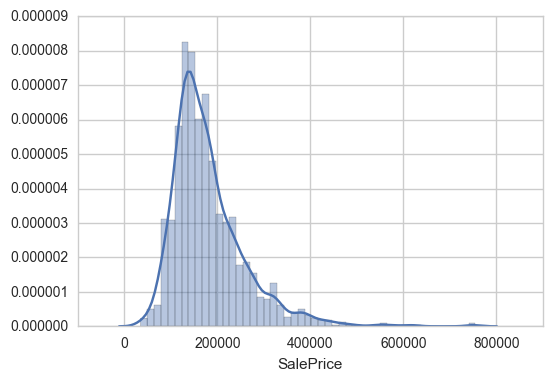

In [8]:
sns.set_style('whitegrid')
sns.distplot(df_train['SalePrice'])

SalePrice is not normally distributed and is skewed to the right

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


##### Normality
Its is not necessary that the dependant variable varaible be normally distributed for regression (OLS) to work but the normality assumption is a convenient property of model's residuals.The error term represents the total causal impact of all variables not included. Otherwise it just measures the incompleteness of your set of predictors. Either way, it is something not observed, which is why making strong assumptions (such as normal distribution) is required. For the stuff you can actually observe, any distribution is fine.
(From wikipedia)
##### Kurtosis
The sample kurtosis(or a measure of the "tailedness" ) is a useful measure of whether there is a problem with outliers in a data set.The kurtosis of any univariate normal distribution is 3. It is common to compare the kurtosis of a distribution to this value. Distributions with kurtosis less than 3 are said to be platykurtic, although this does not imply the distribution is "flat-topped" as sometimes reported. Rather, it means the distribution produces fewer and less extreme outliers than does the normal distribution. An example of a platykurtic distribution is the uniform distribution, which does not produce outliers. Distributions with kurtosis greater than 3 are said to be leptokurtic. An example of a leptokurtic distribution is the Laplace distribution, which has tails that asymptotically approach zero more slowly than a Gaussian, and therefore produces more outliers than the normal distribution.

In [53]:
print(np.where(test_normality(df_train[quantitative]),"Normal","Not Normal"))

Not Normal


None of the numeric features are normally distributed.

We will have to apply log transformation to the variables (both response and explanatory). 

### Multivariate Analysis
[[ go back to the top ]](#Table-of-contents)<br>


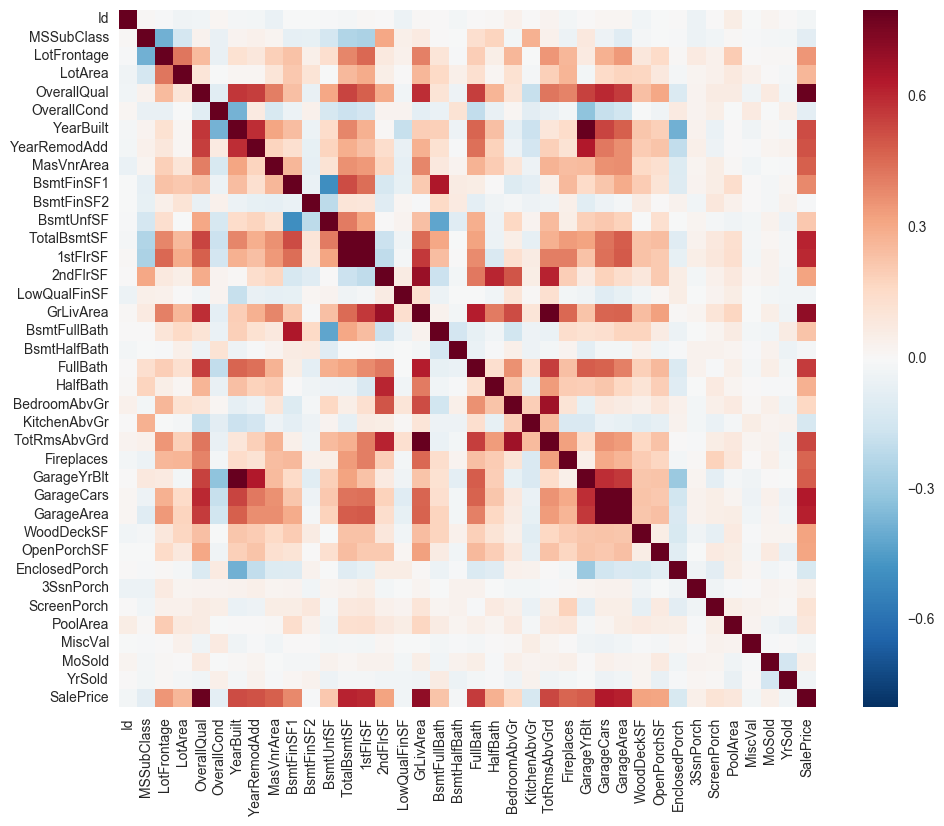

In [10]:
#Numerical Features
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

- Two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.
- Another thing that got my attention was the 'SalePrice' correlations. 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' are highly correlated to SalesPrice, but we can also see many other variables that should be taken into account. 

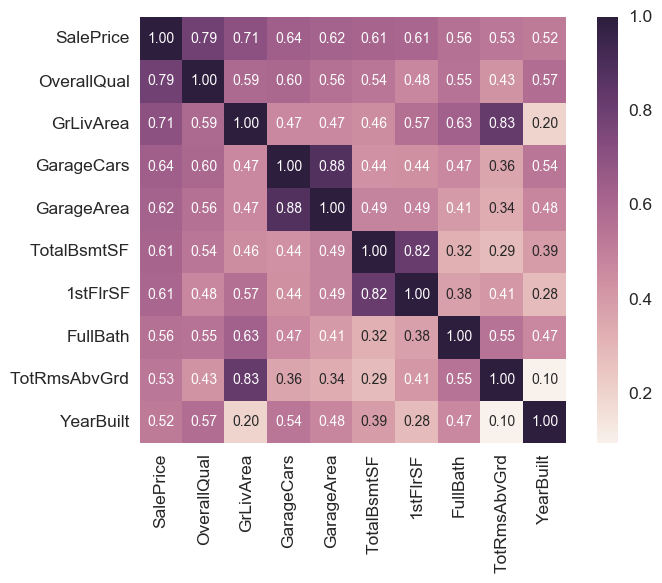

In [20]:
#Heatmap for the 10 explanatory variables that are most correlated to 'SalePrice'
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.abs().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be telling the same thing. We can keep 'TotalBsmtSF' 
- 'TotRmsAbvGrd' and 'GrLivArea' are also correlated

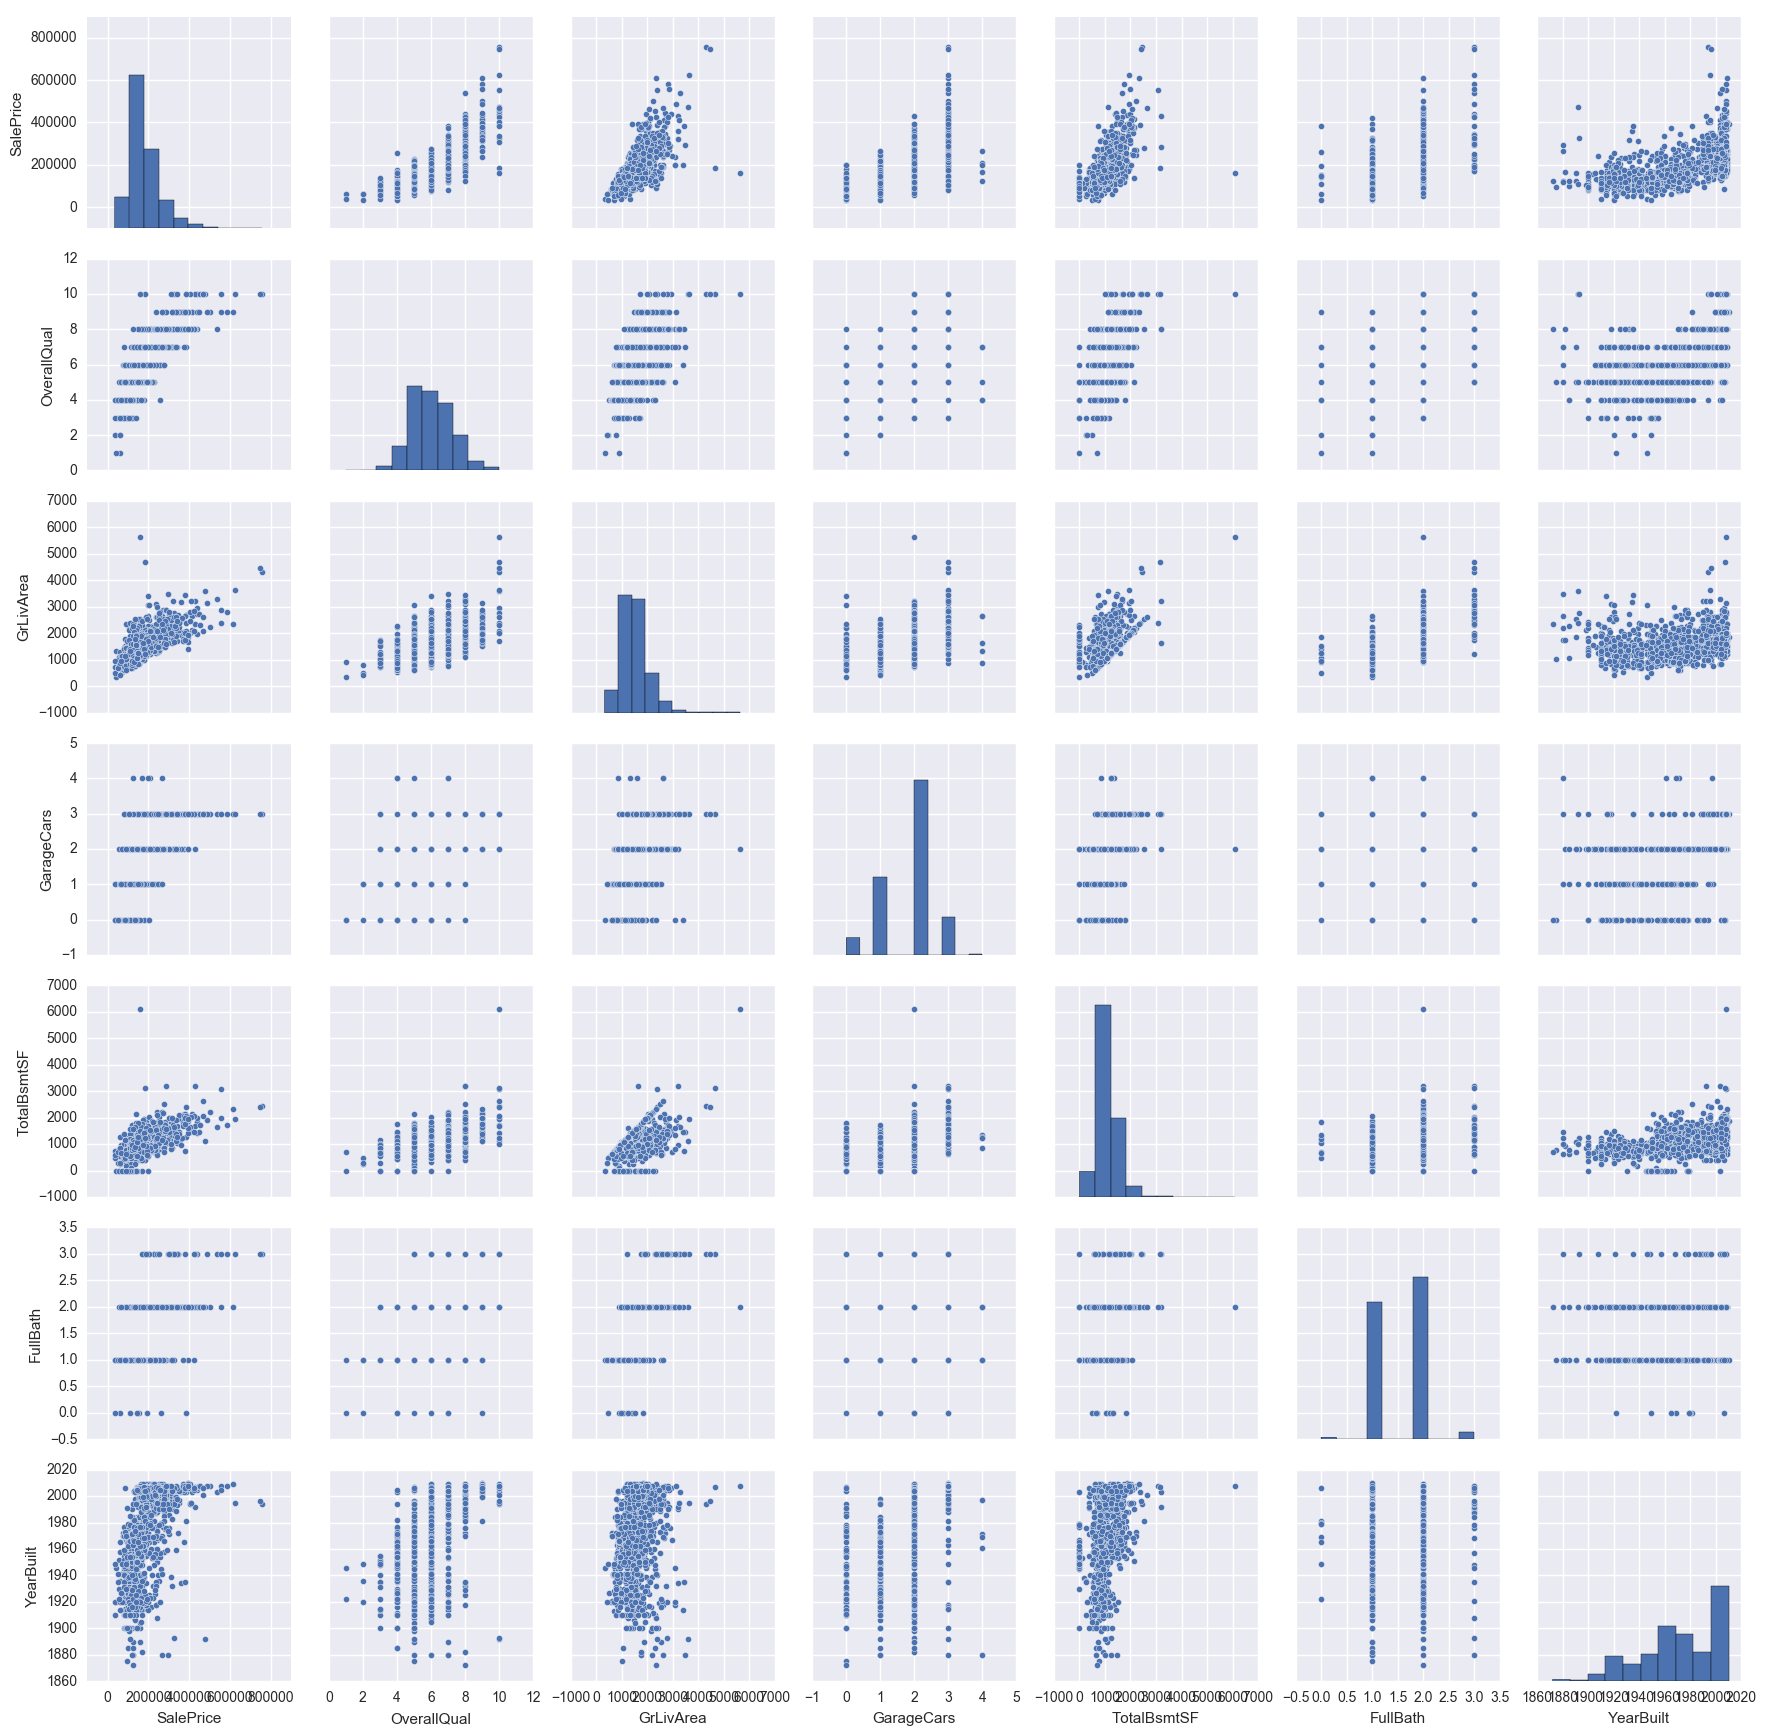

In [12]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

'SalePrice' and 'GrLivArea' & 'SalePrice' and 'TotalBsmtSF' have a linear relationship.

(-0.5, 9.5, 0, 800000)

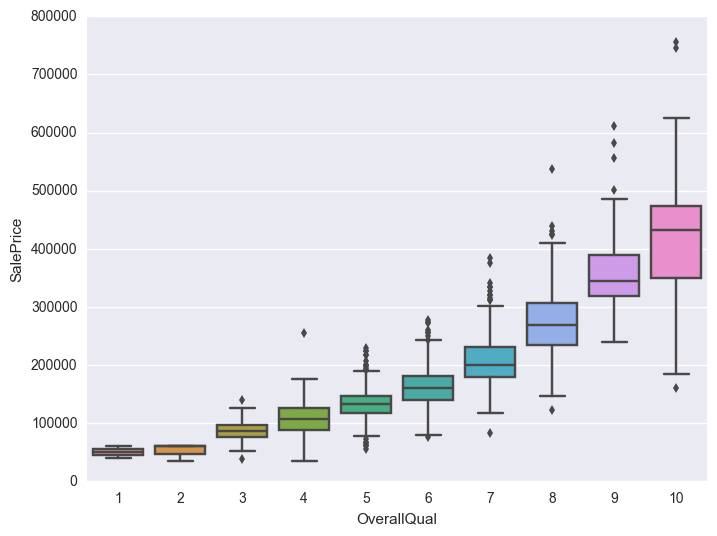

In [15]:
#box plot overallqual/saleprice(corr : 0.79 (highest))
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

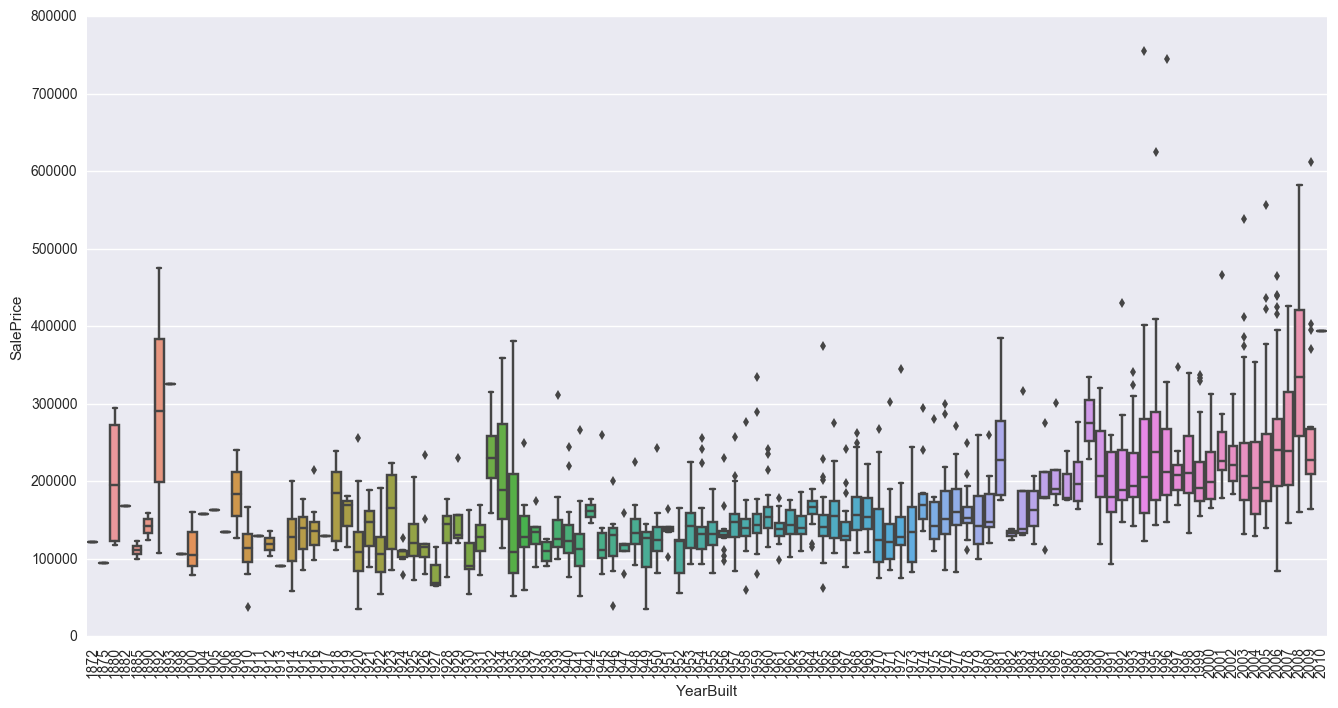

In [17]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

Although it's not a strong tendency, people more prone to spend more money in new stuff than in old relics.
We don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

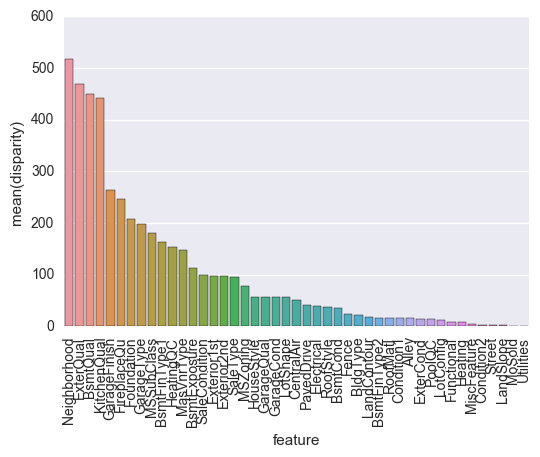

In [8]:
#Categorical variables
for c in qualitative:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])
        df_train[c] = df_train[c].fillna('MISSING')

#Performs a 1-way ANOVA.
#The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 
#The test is applied to samples from two or more groups, possibly with differing sizes.
#ANOVA test intuition
#For each variable SalePrices are partitioned to distinct sets based on category values.
#Then check with ANOVA test if sets have similar distributions. 
#If variable has minor impact then set means should be equal. 
#The F statistic is a ratio of 2 different measure of variance for the data. 
#If the null hypothesis is true then these are both estimates of the same thing and the ratio will be around 1. 
#I just want to look at the ANOVA p-value, “Prob > F”, 
#the probability of getting an even greater F statistic than I got, given the means are equal(Null hypothesis is true).
#Low p-values are indications of strong evidence against the null hypothesis and decreasing pval is sign of increasing diversity in partitions.
#The obvious way to get detail for very small positive values is to calculate log10(pvalue) and plot that. 
#In fact, we would like to have the most significant values on top, not bottom, 
#so we flip signs and plot –log10(pvalue)
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train)
a['disparity'] = -np.log(a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [197]:
df_train_bk = df_train.copy()
#Now qualitative variables get encoded according to ordering based on mean of SalePrice.
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df_train_bk, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSSubClass_E', 'MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'MoSold_E', 'SaleType_E', 'SaleCondition_E']


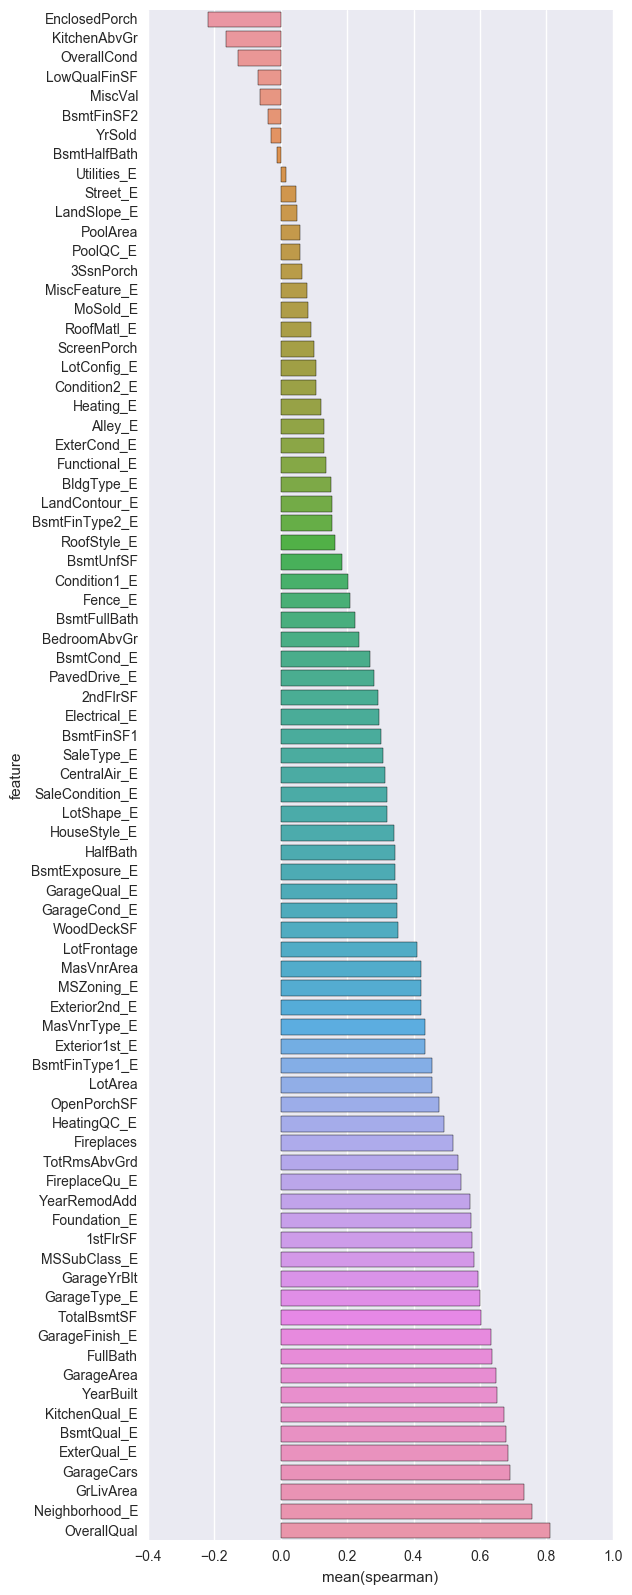

In [244]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    #print(spr)
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(df_train_bk, features)

A Spearman correlation of 1 results when the two variables being compared are monotonically related, even if their relationship is not linear. This means that all data-points with greater x-values than that of a given data-point will have greater y-values as well. In contrast, this does not give a perfect Pearson correlation. OverallQual is main criterion in establishing house price. Neighborhood has big influence, partially it has some intrisinc value in itself, but also houses in certain regions tend to share same characteristics (confunding) what causes similar valuations.

In [225]:
corrmat_all = df_train_bk.corr('spearman')

In [229]:
corrmat_all.drop('Id',axis=1, inplace=True)
corrmat_all.drop('Id',axis=0, inplace=True)

In [241]:
sorted_corr = corrmat_all.abs().unstack().order(ascending=False, kind="quicksort")
sorted_corr[(sorted_corr.values < 1) & (sorted_corr.values > 0.5)].drop_duplicates(keep='first')

C:\Users\Vini\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


PoolQC_E         PoolArea          0.999991
MiscVal          MiscFeature_E     0.940846
Exterior2nd_E    Exterior1st_E     0.890801
GarageYrBlt      YearBuilt         0.890546
MasVnrArea       MasVnrType_E      0.876145
GarageCars       GarageArea        0.853317
FireplaceQu_E    Fireplaces        0.852474
1stFlrSF         TotalBsmtSF       0.829292
GrLivArea        TotRmsAbvGrd      0.827874
SalePrice        OverallQual       0.809829
YearBuilt        BsmtQual_E        0.774373
SalePrice        Neighborhood_E    0.755779
Foundation_E     YearBuilt         0.743129
GarageCond_E     GarageQual_E      0.737791
SalePrice        GrLivArea         0.731310
ExterQual_E      KitchenQual_E     0.725266
YearRemodAdd     GarageYrBlt       0.722377
GarageYrBlt      BsmtQual_E        0.720482
OverallQual      ExterQual_E       0.715988
Foundation_E     GarageYrBlt       0.705774
Neighborhood_E   YearBuilt         0.698549
SalePrice        GarageCars        0.690711
YearRemodAdd     YearBuilt      

In [246]:
#These are the variables strongly correlated to SalePrice
sorted_corr[(sorted_corr.values < 1) & (sorted_corr.values > 0.4)].drop_duplicates(keep='first')['SalePrice']

OverallQual       0.809829
Neighborhood_E    0.755779
GrLivArea         0.731310
GarageCars        0.690711
ExterQual_E       0.684014
KitchenQual_E     0.672849
YearBuilt         0.652682
GarageType_E      0.598814
MSSubClass_E      0.583130
1stFlrSF          0.575408
Foundation_E      0.573580
YearRemodAdd      0.571159
TotRmsAbvGrd      0.532586
Fireplaces        0.519247
OpenPorchSF       0.477561
LotArea           0.456461
BsmtFinType1_E    0.454237
Exterior2nd_E     0.423422
MSZoning_E        0.422232
LotFrontage       0.409076
dtype: float64

In [269]:
#sorted_corr[(sorted_corr.values < 1) & (sorted_corr.values > 0.4)].drop_duplicates(keep='first')['TotRmsAbvGrd']
sorted_corr[(sorted_corr.values < 1) & (sorted_corr.values > 0.4)]['YearRemodAdd']

GarageYrBlt       0.722377
YearBuilt         0.684388
KitchenQual_E     0.659769
ExterQual_E       0.631327
BsmtQual_E        0.585577
SalePrice         0.571159
HeatingQC_E       0.563356
Foundation_E      0.560392
OverallQual       0.557723
Neighborhood_E    0.520480
Exterior2nd_E     0.503424
Exterior1st_E     0.485932
BsmtFinType1_E    0.476862
GarageFinish_E    0.459716
GarageCars        0.456245
FullBath          0.431390
SaleType_E        0.420345
dtype: float64

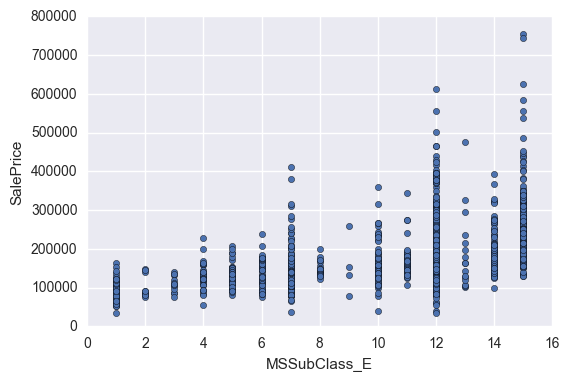

In [282]:
var = 'MSSubClass_E'
data = pd.concat([df_train_bk['SalePrice'], df_train_bk[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)) 

In [287]:
sorted_corr[(sorted_corr.values < 1) & (sorted_corr.values > 0.4)]['Fireplaces']

FireplaceQu_E    0.852474
SalePrice        0.519247
GrLivArea        0.480804
OverallQual      0.420626
dtype: float64

<a id='#Takeaway3'></a>

### Takeaway from "Multivariate Analysis"
What did I learn? <br>
[[ go back to the top ]](#Table-of-contents)
<table>
<tr><td><b>Feature</b></td><td><b>Corr with SalePrice</b></td><td><b>Comment</b></td></th></tr>
<tr><td>OverallQual</td><td>0.809829</td><td>Highest correlation with SalePrice </td></tr>
<tr><td>Neighborhood_E</td><td>    0.755779</td><td>High Correlation with OverallQual and Year Built</td></tr>
<tr><td>GrLivArea</td><td>         0.731310</td><td>Correlated with OverallQual</td></tr>
<tr><td>GarageCars</td><td>        0.690711</td><td>Correlated with OverallQual</td></tr>
<tr><td>ExterQual_E</td><td>       0.684014</td><td>Correlated with OverallQual</td></tr>
<tr><td>KitchenQual_E</td><td>     0.672849</td><td>Correlated with OverallQual</td></tr>
<tr><td>YearBuilt</td><td>         0.652682</td><td>Correlated with OverallQual,Neighborhood_E</td></tr>
<tr><td>GarageType_E</td><td>      0.598814</td><td>Correlated with MSSubClass_E,YearBuilt,Neighborhood_E</td></tr>
<tr><td>MSSubClass_E</td><td>      0.583130</td><td>Correlated with YearBuilt,Neighborhood_E</td></tr>
<tr><td>1stFlrSF</td><td>          0.575408</td><td>Weakly Correlated with GrLivArea</td></tr>
<tr><td>Foundation_E</td><td>      0.573580</td><td>Correlated with YearBuilt</td></tr>
<tr><td>YearRemodAdd</td><td>      0.571159</td><td>Correlated with KitchenQual_E,YearBuilt</td></tr>
<tr><td><strike>TotRmsAbvGrd</strike></td><td>      0.532586</td><td>This is highly correlated to GrLivArea(0.827874
) hence will be removed</td></tr>
<tr><td>Fireplaces</td><td>        0.519247</td><td></td></tr>
<tr><td>OpenPorchSF</td><td>       0.477561</td><td></td></tr>
<tr><td>LotArea</td><td>           0.456461</td><td></td></tr>
<tr><td>BsmtFinType1_E</td><td>    0.454237</td><td></td></tr>
<tr><td>Exterior2nd_E</td><td>     0.423422</td><td></td></tr>
<tr><td>MSZoning_E</td><td>        0.422232</td><td></td></tr>
<tr><td>LotFrontage</td><td>       0.409076</td><td></td></tr>
</table>
- Relationship between 'SalePrice' and 'GrLivArea' & 'TotalBsmtSF' is heteroscedastic (cone-shaped) indicating need for transformation. 

May be dimentionality reduction (PCA) can help deal with multicollinearity.

<a id='#Outliers'></a>

# Outliers
[[ go back to the top ]](#Table-of-contents)<br>


###### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [23]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Low range values are similar and not too far from 0.
High range values are far from 0 and the 7.something values are really out of range.
For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.
###### Bivariate Analysis

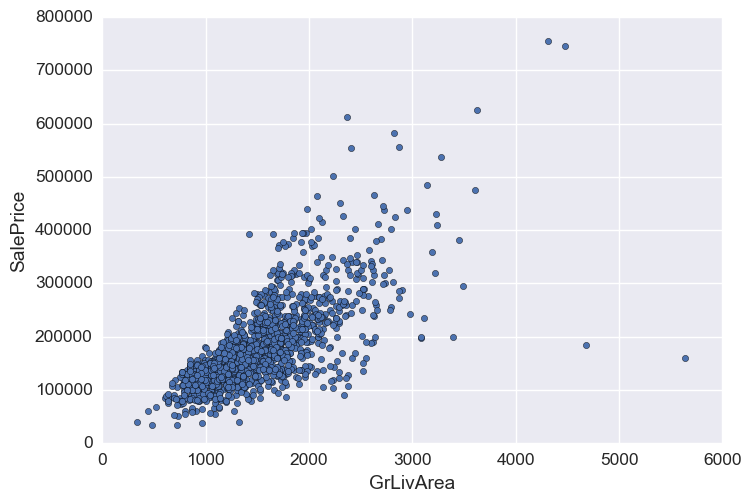

In [25]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

What has been revealed:
The two values with bigger 'GrLivArea' seem strange and they are not following the crowd these two points are not representative of the typical case.They are really large houses that sold for really cheap. More generally, the author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset.
Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf Therefore, we'll define them as outliers and delete them.
The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [9]:
#deleting points
df_train = df_train[df_train.GrLivArea < 4000]

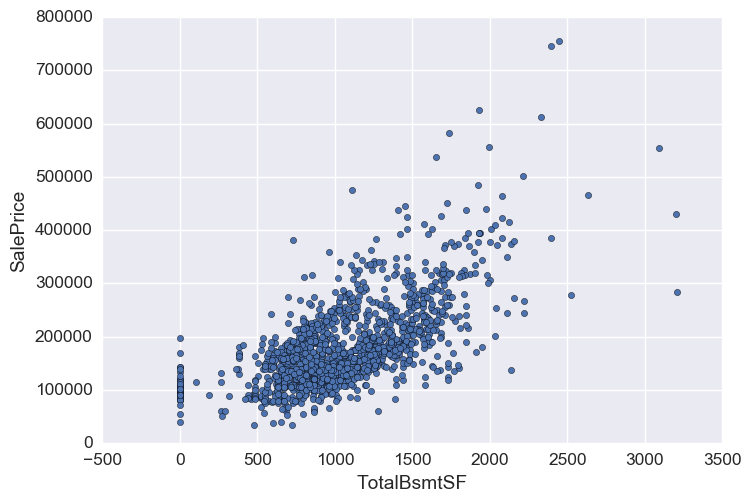

In [28]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Ok.. let them be !

<a id='#Feature12'></a>

# Apply Transformations

[[ go back to the top ]](#Table-of-contents)
Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation. Transformation helps us to convert a non-linear relation into linear relation. Scatter plot can be used to find the relationship between two continuous variables. These transformations also improve the prediction. Log transformation is one of the commonly used transformation technique used in these situations.<br>
Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. Some modeling techniques requires normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness. For right skewed distribution, we take square / cube root or logarithm of variable and for left skewed, we take square / cube or exponential of variables.<br>

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
Id               1456 non-null int64
MSSubClass       1456 non-null category
MSZoning         1456 non-null category
LotFrontage      1197 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null category
Alley            1456 non-null category
LotShape         1456 non-null category
LandContour      1456 non-null category
Utilities        1456 non-null category
LotConfig        1456 non-null category
LandSlope        1456 non-null category
Neighborhood     1456 non-null category
Condition1       1456 non-null category
Condition2       1456 non-null category
BldgType         1456 non-null category
HouseStyle       1456 non-null category
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null category
RoofMatl         1456 non-null c

In [ ]:
categorical_features = train.select_dtypes(include = ["category"]).columns
numerical_features = train.select_dtypes(exclude = ["category"]).columns

In [12]:
#log transform skewed numeric features:
from scipy.stats import skew
def log_transform(train):
    #categorical_features = train.select_dtypes(include = ["category"]).columns
    #numerical_features = train.select_dtypes(exclude = ["category"]).columns
    print("No. of numeric features :",len(numerical_features))
    print("No. of categorical features :",len(categorical_features))
    train_num = train[numerical_features]
    train_cat = train[categorical_features]
    # As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
    skewness = train_num.apply(lambda x: skew(x))
    skewness = skewness[abs(skewness) > 0.5]
    print(str(skewness.shape[0]) + " skewed numerical features to log transform")
    skewed_features = skewness.index
    #a log transform of data set containing zero values can be easily handled by numpy.log1p()
    train_num[skewed_features] = np.log1p(train_num[skewed_features])
    print("log transformed")
    print(train_num[skewed_features].head(5))
    return (pd.concat([train_num, train_cat], axis = 1))

In [13]:
df_train = log_transform(df_train)

No. of numeric features : 36
No. of categorical features : 45
24 skewed numerical features to log transform


C:\Users\Vini\Anaconda3\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


log transformed
    LotArea  OverallCond  YearBuilt  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0  9.042040     1.791759   7.602900    6.561031         0.0   5.017280   
1  9.169623     2.197225   7.589336    6.886532         0.0   5.652489   
2  9.328212     1.791759   7.601902    6.188264         0.0   6.075346   
3  9.164401     1.791759   7.557995    5.379897         0.0   6.293419   
4  9.565284     1.791759   7.601402    6.486161         0.0   6.196444   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea    ...      TotRmsAbvGrd  \
0  6.753438  6.751101           0.0   7.444833    ...          2.197225   
1  7.141245  0.000000           0.0   7.141245    ...          1.945910   
2  6.825460  6.765039           0.0   7.488294    ...          1.945910   
3  6.869014  6.629363           0.0   7.448916    ...          2.079442   
4  7.044033  6.960348           0.0   7.695758    ...          2.302585   

   Fireplaces  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.

### Applying Transformations to the response variable
Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.<br>
According to Hair et al. (2013), four assumptions should be tested:<br>
<em>Normality</em> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). We have already checked univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.<br>
<em>Homoscedasticity</em> - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.<br>
<em>Linearity</em>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. <br>
<em>Absence of correlated errors</em> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.<br>

C:\Users\Vini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


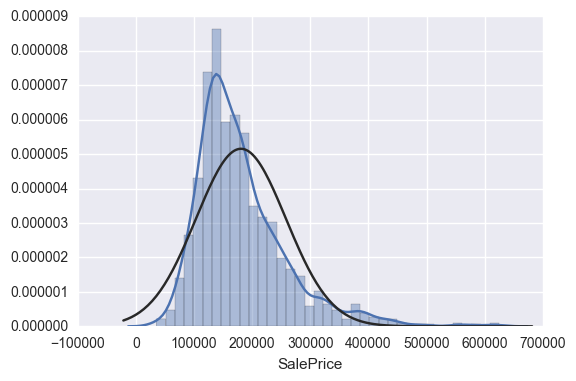

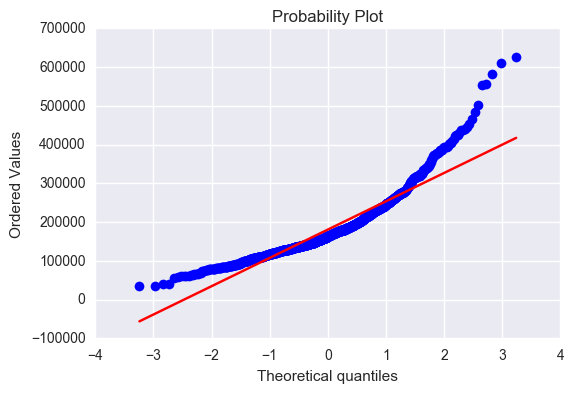

In [134]:
#Before
sns.distplot(train_y, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train_y, plot=plt)

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
A simple data transformation can solve the problem.in case of positive skewness, log transformations usually works well. 

C:\Users\Vini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


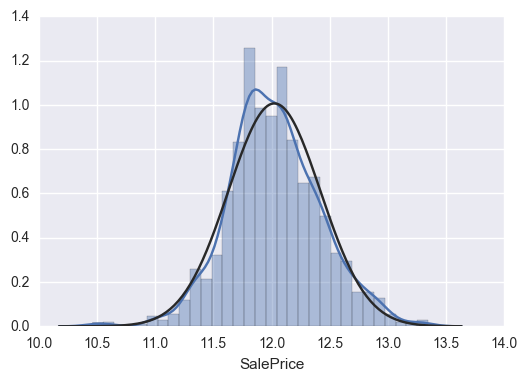

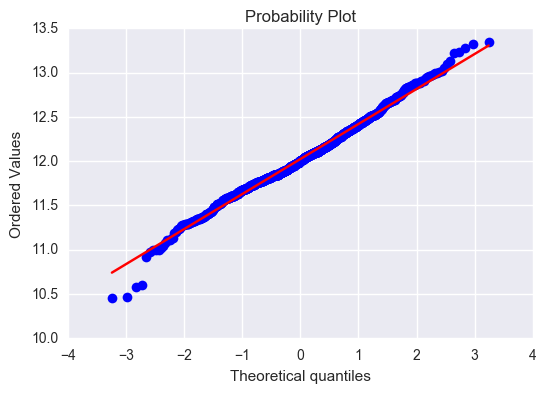

In [136]:
#After
sns.distplot(train_y, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train_y, plot=plt)

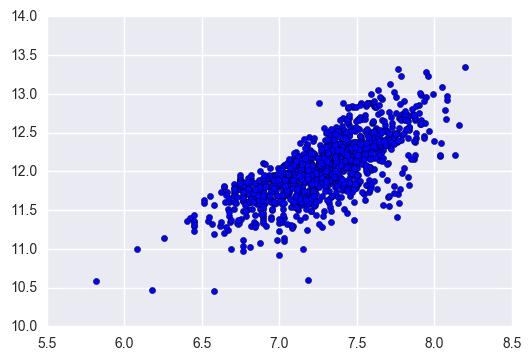

In [137]:
#'homoscedasticity'
#scatter plot
plt.scatter(train_X['GrLivArea'], train_y)

Older versions of this scatter plot (previous to log transformations), had a conic shape. As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

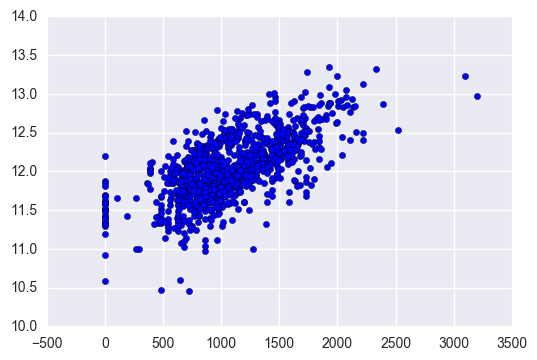

In [138]:
#scatter plot
plt.scatter(train_X['TotalBsmtSF'], train_y)

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'.

<a id='#Feature2'></a>

# Convert Categorical Variables 

[[ go back to the top ]](#Table-of-contents)


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
Id               1456 non-null int64
LotFrontage      1197 non-null float64
LotArea          1456 non-null float64
OverallQual      1456 non-null int64
OverallCond      1456 non-null float64
YearBuilt        1456 non-null float64
YearRemodAdd     1456 non-null int64
MasVnrArea       1448 non-null float64
BsmtFinSF1       1456 non-null float64
BsmtFinSF2       1456 non-null float64
BsmtUnfSF        1456 non-null float64
TotalBsmtSF      1456 non-null int64
1stFlrSF         1456 non-null float64
2ndFlrSF         1456 non-null float64
LowQualFinSF     1456 non-null float64
GrLivArea        1456 non-null float64
BsmtFullBath     1456 non-null float64
BsmtHalfBath     1456 non-null float64
FullBath         1456 non-null int64
HalfBath         1456 non-null float64
BedroomAbvGr     1456 non-null int64
KitchenAbvGr     1456 non-null float64
TotRmsAbvGrd     1456 non-null float64
Fireplac

In [15]:
# Encode some categorical features as ordered numbers when there is information in the order
encode_dict =      {"Alley" : {"Grvl" : 1, "Pave" : 2, "MISSING":0},
                       "BsmtCond" : {"MISSING" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"MISSING" : 0,"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"MISSING" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"MISSING" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"MISSING" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"MISSING" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"MISSING" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"MISSING" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 3, "Mod" : 2, "Gtl" : 1},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"MISSING" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                       "CentralAir": {"Y":1, "N":0}}

In [16]:
from collections import Counter 
def convert_categorical(train):
    print("Total number of features before encoding :",train.shape[1])  
    numeric = train.select_dtypes(include = [np.number]).columns
    print("Number of numeric features :",len(numeric))
    categorical = train.select_dtypes(exclude = [np.number]).columns
    for c in categorical:
         train[c] = train[c].astype('object')
    print("Number of categorical features :",len(categorical))
    l1 = list(train[categorical].columns)
    l2 = list(encode_dict.keys())
    l3 = list((Counter(l1) - Counter(l2)).elements())
    cat1 = train[l2].replace(encode_dict)
    print("Number of categorical features for which ordering makes sense  :",len(l2))
    print("Number of categorical features for which dummy variables were created :",len(l3))
    dummy_ct = 0 
    for feature in l3:
         print("Feature - ",feature)
         print("Number of dummy variables created ",(len(train[feature].unique()) - 1))
         dummy_ct = dummy_ct + (len(train[feature].unique()) - 1)
    cat2 = pd.get_dummies(train[l3], drop_first=True)
    print("Number of dummy variables were created :",dummy_ct)
    train = pd.concat([train[numeric], cat1, cat2], axis=1)
    print("Total number of features after encoding :",train.shape[1]) 
    return train

In [17]:
print("Converting categorical variables")
df_train = convert_categorical(df_train)

Converting categorical variables
Total number of features before encoding : 81
Number of numeric features : 36
Number of categorical features : 45
Number of categorical features for which ordering makes sense  : 21
Number of categorical features for which dummy variables were created : 24
Feature -  Heating
Number of dummy variables created  5
Feature -  Fence
Number of dummy variables created  4
Feature -  Exterior2nd
Number of dummy variables created  15
Feature -  LotConfig
Number of dummy variables created  4
Feature -  MSZoning
Number of dummy variables created  4
Feature -  MoSold
Number of dummy variables created  11
Feature -  GarageType
Number of dummy variables created  6
Feature -  Exterior1st
Number of dummy variables created  14
Feature -  GarageFinish
Number of dummy variables created  3
Feature -  BldgType
Number of dummy variables created  4
Feature -  MSSubClass
Number of dummy variables created  14
Feature -  Condition2
Number of dummy variables created  7
Feature -  

In [443]:
#Now qualitative variables get encoded according to ordering based on mean of SalePrice.
#def encode(frame, feature):
#    ordering = pd.DataFrame()
#    ordering['val'] = frame[feature].unique()
#    ordering.index = ordering.val
#    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
#    ordering = ordering.sort_values('spmean')
#    ordering['ordering'] = range(1, ordering.shape[0]+1)
#    ordering = ordering['ordering'].to_dict()
    
#    for cat, o in ordering.items():
#        frame.loc[frame[feature] == cat, feature+'_E'] = o
    #print(ordering)
#    return ordering
    
#qual_encoded = []
#ordering = {}
#encode_dict = {}
#for q in qualitative:  
#    ordering = encode(train_X_bk, q)
#    print(ordering)
#    encode_dict[q] = ordering
#    qual_encoded.append(q+'_E')
#print(qual_encoded)

In [ ]:
#for feature in qualitative:
#    ordering = encode_dict.get(feature)
#    for cat, o in ordering.items():
#        print(ordering.items())
#        test_X.loc[test_X[feature] == cat, feature+'_E'] = o

In [503]:
corr_aft_encode = df_train.corr('spearman')

In [504]:
corr_aft_encode.drop('Id',axis=1, inplace=True)
corr_aft_encode.drop('Id',axis=0, inplace=True)
sorted_corr1 = corr_aft_encode.abs().unstack().order(ascending=False, kind="quicksort")
sorted_corr1[(sorted_corr1.values < 1) & (sorted_corr1.values > 0.6)].drop_duplicates(keep='first')['SalePrice'].head(20)

C:\Users\Vini\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


OverallQual    0.810285
GrLivArea      0.731238
GarageCars     0.689725
ExterQual      0.684096
KitchenQual    0.672413
dtype: float64

In [513]:
filter_col = [col for col in list(df_train.columns) if col.startswith('Neighborhood')]

In [523]:
counter = 0
for col in filter_col:
    print(col + " count : " + str(df_train[df_train[col] == 1].shape[0]))
    counter += df_train[df_train[col] == 1].shape[0] 
print(counter)

Neighborhood_Blueste count : 2
Neighborhood_BrDale count : 16
Neighborhood_BrkSide count : 58
Neighborhood_ClearCr count : 28
Neighborhood_CollgCr count : 150
Neighborhood_Crawfor count : 51
Neighborhood_Edwards count : 98
Neighborhood_Gilbert count : 79
Neighborhood_IDOTRR count : 37
Neighborhood_MeadowV count : 17
Neighborhood_Mitchel count : 49
Neighborhood_NAmes count : 225
Neighborhood_NPkVill count : 9
Neighborhood_NWAmes count : 73
Neighborhood_NoRidge count : 39
Neighborhood_NridgHt count : 77
Neighborhood_OldTown count : 113
Neighborhood_SWISU count : 25
Neighborhood_Sawyer count : 74
Neighborhood_SawyerW count : 59
Neighborhood_Somerst count : 86
Neighborhood_StoneBr count : 25
Neighborhood_Timber count : 38
Neighborhood_Veenker count : 11
1439


This feature used to be one of the most correlated features (with 'Saleprice').After one-hot encoding it fell out of favor..hmm..wonder why?

In [18]:
qualitative = [f for f in df_test.columns if df_test.dtypes[f] == 'object']
for c in qualitative:
    df_test[c] = df_test[c].astype('category')
    if df_test[c].isnull().any():
        df_test[c] = df_test[c].cat.add_categories(['MISSING'])
        df_test[c] = df_test[c].fillna('MISSING')

df_test = convert_categorical(df_test)

Total number of features before encoding : 80
Number of numeric features : 35
Number of categorical features : 45
Number of categorical features for which ordering makes sense  : 21
Number of categorical features for which dummy variables were created : 24
Feature -  Heating
Number of dummy variables created  3
Feature -  Fence
Number of dummy variables created  4
Feature -  Exterior2nd
Number of dummy variables created  15
Feature -  LotConfig
Number of dummy variables created  4
Feature -  MSZoning
Number of dummy variables created  5
Feature -  MoSold
Number of dummy variables created  11
Feature -  GarageType
Number of dummy variables created  6
Feature -  Exterior1st
Number of dummy variables created  13
Feature -  GarageFinish
Number of dummy variables created  3
Feature -  BldgType
Number of dummy variables created  4
Feature -  MSSubClass
Number of dummy variables created  15
Feature -  Condition2
Number of dummy variables created  4
Feature -  MasVnrType
Number of dummy variab

In [19]:
df_train.columns[~(df_train.columns.isin(df_test.columns))]

Index(['SalePrice', 'Heating_GasA', 'Heating_OthW', 'Exterior2nd_Other',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'MiscFeature_TenC',
       'Electrical_MISSING', 'Electrical_Mix', 'HouseStyle_2.5Fin',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll'],
      dtype='object')

In [20]:
df_test.columns[~(df_test.columns.isin(df_train.columns))]

Index(['Exterior2nd_MISSING', 'MSZoning_MISSING', 'Exterior1st_MISSING',
       'MSSubClass_SC150', 'SaleType_MISSING'],
      dtype='object')

There are few discrepancies..but we will address this later. 

<a id='#split'></a>

# Test - Train Split

[[ go back to the top ]](#Table-of-contents)<br>
Data Partitioning and Leakage In typical machine learning tasks, data are divided into different sets (partitions): some data for training the model and some data for evaluating the model. It is critical that all transformations that are used to prepare the training data are applied to any validation, test, or other holdout data. It is also critically important that information from holdout data does not leak into the training data. Information leakage can occur in many ways and can potentially lead to overfitting or overly optimistic error measurements. For example, think of taking a mean or median across your data before partitioning and then later using this mean or median to impute missing values across all partitions of your data. In this case, your training data would be aware of information from your validation, test, or holdout partitions. To avoid this type of leakage, values for imputation and other basic transformations should be generated from only the training data or within each partition independently. Feature extraction can also lead to leakage. Consider principal component analysis (PCA), where features are created by decomposing a covariance or correlation matrix. If that covariance or correlation matrix is generated from all your data and then the derived principal component features or scores are used across all partitions of your data, your training data will be contaminated by information from other partitions. For more complex transformations such as feature extraction and binning, it is best to develop formulas or rules from the training data that can be applied to other partitions of data in order to generate the required features. 


In [23]:
def get_target(train):
    train_y =  train['SalePrice']
    train.drop(['SalePrice','Id'],axis=1,inplace=True)
    return (train_y,train)

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X = train_test_split(df_train, test_size=0.2, random_state=123)

In [24]:
train_y,train_X = get_target(train_X)

C:\Users\Vini\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
test_y,test_X = get_target(test_X)

C:\Users\Vini\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<a id='#Missing-data'></a>

# Missing data

[[ go back to the top ]](#Table-of-contents)<br>
Missingness can actually be predictive: retaining information that is associated with missing values, including the missing values themselves, can actually increase the predictive accuracy of a model. 
When faced with missing values in input variables, practitioners must consider whether missing values are distributed randomly or whether missingness is somehow predictive of the target. If missing values appear at random in the input data, the input rows that contain missing values can be dropped from the analysis without introducing bias into the model. 

Example : From the description -
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool (we replaced this with "Missing" before ANOVA)
Likewise for other features, NA means lack of subject described by attribute, like missing pool, fence, no garage and basement hence Handle missing values for features where median/mean or most common value doesn't make sense.

In [28]:
qualitative = [col for col in df_train.columns if col not in quantitative]

In [31]:
qualitative.remove('SalePrice')
qualitative.remove('Id')

In [32]:
qualitative

['ExterCond',
 'ExterQual',
 'BsmtExposure',
 'Alley',
 'BsmtQual',
 'PavedDrive',
 'Functional',
 'BsmtFinType2',
 'LandSlope',
 'LotShape',
 'Street',
 'Utilities',
 'KitchenQual',
 'GarageCond',
 'HeatingQC',
 'CentralAir',
 'PoolQC',
 'BsmtFinType1',
 'BsmtCond',
 'GarageQual',
 'FireplaceQu',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'Fence_GdWo',
 'Fence_MISSING',
 'Fence_MnPrv',
 'Fence_MnWw',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MoSold_Aug',
 'MoSold_Dec',
 'MoSold_Feb',
 'MoSold_J

In [34]:
def handle_missing(train,train_med=None):
    # Numeric features
    # features in which NA most likely means 0 
    features_NA_0 = ['BedroomAbvGr','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces',
                    'GarageArea','GarageCars','HalfBath','KitchenAbvGr','LotFrontage','MasVnrArea','MiscVal',
                    'OpenPorchSF','PoolArea','ScreenPorch','TotRmsAbvGrd','WoodDeckSF']
    train.update(train[features_NA_0].fillna(0))
    #train_num = train[train.select_dtypes(exclude = ["object"]).columns]
    train_num = train[quantitative]
    print("NAs for numerical features  : " + str(train_num.isnull().values.sum()))
    if train_med is None:
        # Handle remaining missing values for numerical features by using median as replacement
        med_to_impute = train_num.median()
        train_num = train_num.fillna(med_to_impute)
    else:
        med_to_impute = train_med
        train_num = train_num.fillna(train_med)
    print("Remaining NAs for numerical features : " + str(train_num.isnull().values.sum()))
    train = pd.concat([train_num, train[qualitative]], axis = 1)
    return train,med_to_impute

train_med = None
train_X,train_med = handle_missing(train_X,None)
test_X,train_med = handle_missing(test_X,train_med)

C:\Users\Vini\Anaconda3\lib\site-packages\pandas\core\frame.py:3770: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  raise_on_error=True)


NAs for numerical features  : 60
Remaining NAs for numerical features : 0
NAs for numerical features  : 21
Remaining NAs for numerical features : 0


In [35]:
#just checking that there's no missing data missing...
print("train null values : ",train_X.isnull().sum().max()) 
print("test null values : ",test_X.isnull().sum().max()) 

train null values :  0
test null values :  0


<a id='#Feature'></a>

# Feature Engineering

[[ go back to the top ]](#Table-of-contents)

### Feature Engineering : Testing

[[ go back to the top ]](#Table-of-contents)


In [389]:
assert len(test_X[test_X.isnull().any(axis=1)]) == 0 

In [390]:
assert len(train_X[train_X.isnull().any(axis=1)]) == 0

In [393]:
assert test_y.shape[0] == test_X.shape[0]

In [395]:
assert train_y.shape[0] == train_X.shape[0]

<a id='#Feature3'></a>

### Feature Engineering : Standardize

[[ go back to the top ]](#Table-of-contents)
Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.
It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

In [36]:
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()
train_X.loc[:, quantitative] = stdSc.fit_transform(train_X.loc[:, quantitative])
test_X.loc[:, quantitative] = stdSc.transform(test_X.loc[:, quantitative])

In [356]:
#test_X[test_X.isnull().any(axis=1)]

In [456]:
#for c in null_test.isnull().columns:
#    if null_test[c].isnull().any():
#        print(c)

<a id='#Feature10'></a>

### Feature Engineering : Repeat EDA 

[[ go back to the top ]](#Table-of-contents)

In [540]:
x_t = train_X.copy()
x_t['Saleprice'] = train_y.copy()
corr_aft = x_t.corr('spearman')
sorted_corr2 = corr_aft.abs().unstack().order(ascending=False, kind="quicksort")
sorted_corr2[(sorted_corr2.values < 1) & (sorted_corr2.values > 0.6)].drop_duplicates(keep='first')['Saleprice'].head(20)

C:\Users\Vini\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


OverallQual    0.810608
GarageCars     0.686726
BsmtQual       0.680868
KitchenQual    0.665158
YearBuilt      0.661221
dtype: float64

In [559]:
x_t = test_X.copy()
x_t['Saleprice'] = test_y.copy()
corr_aft = x_t.corr('spearman')
sorted_corr2 = corr_aft.abs().unstack().order(ascending=False, kind="quicksort")
sorted_corr2[(sorted_corr2.values < 1) & (sorted_corr2.values > 0.6)].drop_duplicates(keep='first')['Saleprice'].head(20)

C:\Users\Vini\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


OverallQual    0.810201
GrLivArea      0.769278
ExterQual      0.708367
BsmtQual       0.663352
dtype: float64

In [538]:
train_X.shape

(1164, 230)

In [571]:
test_X.shape

(292, 230)

In [619]:
len(train_y)

1164

<a id='#error'></a>

# Error Metric

[[ go back to the top ]](#Table-of-contents)<br>
Models are to be evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [104]:
def RMSE(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

In [125]:
error_df = pd.DataFrame(columns=['TRAIN_RMSE','TRAIN_R2','TEST_RMSE','TEST_R2'])

<a id='#LRV'></a>

# Linear Regression (the Vanilla kind)

[[ go back to the top ]](#Table-of-contents)
Courtesy :  Code, explanations etc from here onwards are drawn heavily from <h4>'Python Machine Learning book'</h4> by Sebastian Raschka .<br>
This will be our baseline model. 

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# pair the feature names with the coefficients
sorted(zip(train_X.columns, lr.coef_), key=lambda x: x[1])
#list(zip(train_X.columns, lr.coef_))

[('GarageType_MISSING', -301027766067.85809),
 ('Condition2_RRAe', -296065826992.44025),
 ('MiscFeature_MISSING', -296065826992.43463),
 ('MiscFeature_Othr', -296065826992.36816),
 ('MiscFeature_TenC', -296065826992.3562),
 ('MiscFeature_Shed', -296065826992.26343),
 ('Exterior2nd_CBlock', -232147493719.25653),
 ('BldgType_Duplex', -121493324930.46783),
 ('Exterior1st_BrkComm', -0.17375158379960934),
 ('MSSubClass_SC190', -0.17186747521542278),
 ('MSSubClass_SC40', -0.16236521093524864),
 ('MSSubClass_SC75', -0.12472297905148871),
 ('Neighborhood_MeadowV', -0.12397923893200621),
 ('Condition2_PosN', -0.10862674839950787),
 ('Foundation_Wood', -0.10777633058029923),
 ('Exterior2nd_Other', -0.10567428543923164),
 ('MSSubClass_SC45', -0.099489237276473408),
 ('LotConfig_FR3', -0.09071445697812229),
 ('Neighborhood_Edwards', -0.08844633958116857),
 ('MSSubClass_SC85', -0.082194157369497964),
 ('MSSubClass_SC30', -0.076351453525652896),
 ('Exterior1st_CemntBd', -0.072914624324427066),
 ('MS

wow..this is just totally uninterpretable!

In [83]:
train_X_pred = lr.predict(train_X)
test_X_pred = lr.predict(test_X)

In [86]:
from sklearn.metrics import r2_score
print('Train RMSE linear: %.3f ' % (
        RMSE(train_y, train_X_pred)))
print('Train R^2 linear: %.3f ' % (
        r2_score(train_y, train_X_pred)))
print('Test RMSE linear: %.3f ' % (
        RMSE(test_y, test_X_pred)))
print('Test R^2 linear: %.3f ' % (
        r2_score(test_y, test_X_pred)))

Train RMSE linear: 0.008 
Train R^2 linear: 0.949 
Test RMSE linear: 1.811 
Test R^2 linear: -1927551926047752585216.000 


In [633]:
print(test_X_pred,test_y)

[  1.22434121e+01   1.18176781e+01   1.29235292e+01   1.22896091e+01
   1.19205375e+01   1.21841485e+01   1.21740574e+01   1.16038464e+01
   1.15598177e+01   1.23704672e+01   1.26281629e+01   1.26989931e+01
   1.24548927e+01   1.18548293e+01   1.18981969e+01   1.26717070e+01
   1.18065874e+01   1.18013794e+01   1.21853313e+01   1.19190676e+01
   1.16027318e+01   1.21391305e+01   1.22378635e+01   1.23194854e+01
   1.26926346e+01   1.16308279e+01   1.19774349e+01   1.17404969e+01
   1.17026538e+01   1.20777720e+01   1.13293774e+01   1.20051305e+01
   1.23794628e+01   1.20861692e+01   1.17128075e+01   1.16431576e+01
   1.19361727e+01   1.20224998e+01   1.20687684e+01   1.25815139e+01
   1.19744198e+01   1.17376088e+01   1.10409087e+01   1.17192396e+01
   1.21402534e+01   1.22908833e+01   1.18029780e+01   1.17612642e+01
   1.14127130e+01   1.19735140e+01   1.16118414e+01   1.23772973e+01
   1.19260137e+01   1.26524773e+01   1.24701770e+01   1.17724623e+01
   1.19079181e+01   1.11488733e+01

In [640]:
np.sqrt(np.sum(np.square(test_X_pred - test_y))/len(test_y))

60089263022.429878

In [46]:
test_diff = (test_X_pred - test_y)

In [47]:
test_diff[test_diff.abs() > 1]

346    2.960658e+11
583    4.235627e+09
Name: SalePrice, dtype: float64

Clearly these two stand out !

In [44]:
test_y.loc[346]

11.928347504569842

In [674]:
test_X_pred[test_y.index.get_loc(346)]

-1026805776622.0939

In [675]:
test_X.loc[346]

LotFrontage          -1.735264
LotArea               0.693695
OverallQual          -0.069739
OverallCond           1.918245
YearBuilt            -0.368177
YearRemodAdd          0.629313
MasVnrArea           -0.576723
BsmtFinSF1            0.658845
BsmtFinSF2           -0.353813
BsmtUnfSF             0.261035
TotalBsmtSF          -0.248856
1stFlrSF             -0.472996
2ndFlrSF             -0.839990
LowQualFinSF         -0.134782
GrLivArea            -1.217018
BsmtFullBath         -0.836433
BsmtHalfBath         -0.247847
FullBath             -1.042666
HalfBath             -0.745442
BedroomAbvGr         -1.061597
KitchenAbvGr         -0.213418
TotRmsAbvGrd         -0.947625
Fireplaces           -1.011536
GarageYrBlt          -0.759527
GarageCars           -1.037922
GarageArea           -0.812524
WoodDeckSF           -0.963723
OpenPorchSF          -1.057583
EnclosedPorch        -0.391809
3SsnPorch            -0.131321
                        ...   
LotConfig_Inside     -1.652504
Heating_

In [59]:
(df_train.loc[df_train.index.get_loc(346)])['SalePrice']

11.928347504569842

Lets remove those 2 offending rows from the test set and see if that makes any difference.

In [60]:
test_X_1 = test_X.copy()
test_y_1 = test_y.copy()

In [62]:
test_X_1.drop([346,583], axis=0, inplace=True)

In [67]:
test_y_1.drop([346,583], axis=0, inplace=True)


In [68]:
test_X_pred_1 = lr.predict(test_X_1)

In [105]:
print('Train RMSE linear: %.3f ' % (
        RMSE(train_y, train_X_pred)))
print('Train R^2 linear: %.3f ' % (
        r2_score(train_y, train_X_pred)))
print('Test RMSE linear: %.3f ' % (
        RMSE(test_y_1, test_X_pred_1)))
print('Test R^2 linear: %.3f ' % (
        r2_score(test_y_1, test_X_pred_1)))

Train RMSE linear: 0.008 
Train R^2 linear: 0.949 
Test RMSE linear: 0.011 
Test R^2 linear: 0.901 


Looks like the two outliers were really doing a number on our prediction!<br>
For the train set the RMSE was 0.008 while for the test set RMSE was 0.011 which is slightly higher suggesting some overfitting.<br>
R2 values suggests 94.9% percent of the response variable variation in the training set and 90% in the test set is explained by the linear model, which is not bad!


Since our model uses multiple explanatory variables, we can't visualize the linear regression line (or hyperplane to be precise) in a two-dimensional plot, but we can plot the residuals (the differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model. Those residual plots are a commonly used graphical analysis for diagnosing regression models to detect nonlinearity and outliers, and to check if the errors are randomly distributed.

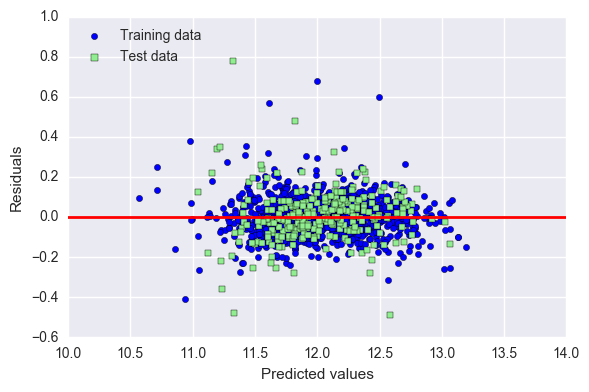

In [82]:
plt.scatter(x=train_X_pred, y=(train_X_pred - train_y), c='blue', marker='o', label='Training data')
plt.scatter(y=(test_X_pred_1 - test_y_1), x=test_X_pred_1, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([10, 14])
#plt.ylim([-.2, .2])
plt.tight_layout()
plt.show()

In the case of a perfect prediction, the residuals would be exactly zero, which we will probably never encounter in realistic and practical applications. However, for a good regression model, we would expect that the errors are randomly distributed and the residuals should be randomly scattered around the centerline. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which is leaked into the residuals as we can slightly see in our preceding residual plot. Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline.

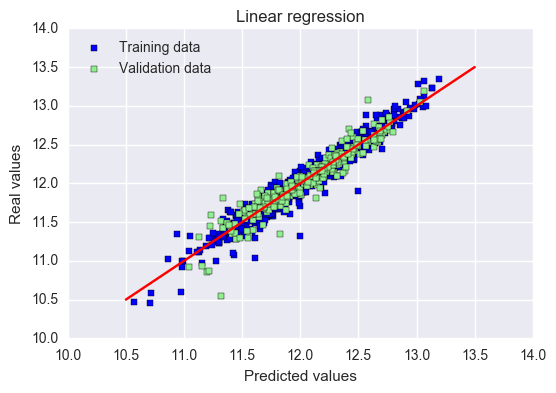

In [92]:
plt.scatter(train_X_pred, train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_X_pred_1, test_y_1, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

<font color='red'>But, all this was also made possible by deleting two misbehaving datapoints in the test set. But that was just a workaround, what we need is a more robust model.</font>

<a id='#Feature-Selection'></a>

<a id='#RANSAC'></a>

# Linear Regression (with RANSAC)

[[ go back to the top ]](#Table-of-contents)
Linear regression models can be heavily impacted by the presence of outliers. In certain situations, a very small subset of our data can have a big effect on the estimated model coefficients.  

An alternative to throwing out outliers is a robust method of regression using the<b> RANdom SAmple Consensus (RANSAC) </b> algorithm, which fits a regression model to a subset of the data, the so-called inliers.
We can summarize the iterative RANSAC algorithm as follows:
- Select a random number of samples to be inliers and fit the model.
- Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
- Refit the model using all inliers.
- Estimate the error of the fitted model versus the inliers.
- Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations has been reached; go back to step 1 otherwise.<br>
<br>
We set the maximum number of iterations of the RANSACRegressor to 100, and using min_samples=50, we set the minimum number of the randomly chosen samples to be at least 50. Using the residual_metric parameter, we provided a callable lambda function that simply calculates the absolute vertical distances between the fitted line and the sample points. By setting the residual_threshold parameter to 5.0, we only allowed samples to be included in the inlier set if their vertical distance to the fitted line is within 5 distance units, which works well on this particular dataset. By default, scikit-learn uses the MAD estimate to select the inlier threshold, where MAD stands for the Median Absolute Deviation of the target values y. However, the choice of an appropriate value for the inlier threshold is problem-specific, which is one disadvantage of RANSAC.<br>

In [93]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), 
           max_trials=100, 
           min_samples=50, 
           residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
           residual_threshold=5.0, 
          random_state=0)
ransac.fit(train_X, train_y)

C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\linear_model\ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x000002637EB5E8C8>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [113]:
ransac_predict_train = ransac.predict(train_X)
ransac_predict_test = ransac.predict(test_X)

In [120]:
print('Train RMSE LR + RANSAC: %.3f ' % (
        RMSE(train_y, ransac_predict_train)))
print('Train R^2 LR + RANSAC: %.3f ' % (
        r2_score(train_y, ransac_predict_train)))
print('Test RMSE LR + RANSAC: %.3f ' % (
        RMSE(test_y, ransac_predict_test)))
print('Test R^2 LR + RANSAC: %.3f ' % (
        r2_score(test_y, ransac_predict_test)))

Train RMSE LR + RANSAC: 0.008 
Train R^2 LR + RANSAC: 0.949 
Test RMSE LR + RANSAC: 1.713 
Test R^2 LR + RANSAC: -25685742458222194688.000 


In [98]:
test_diff = (ransac_predict_test - test_y)

In [99]:
test_diff[test_diff.abs() > 1]

346    3.394997e+10
583    3.961272e+09
Name: SalePrice, dtype: float64

In [100]:
test_y.loc[346]

11.928347504569842

In [103]:
ransac_predict_test[test_y.index.get_loc(346)]

33949971074.032722

<a id='#LRL2'></a>

#  Linear Regression with Ridge regularization (L2 penalty)

[[ go back to the top ]](#Table-of-contents)
Regularization is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting. The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.<br>
Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our cost function. 
May be regularization will filter out those two abominable datapoints. <br>
Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our least-squares cost function:<br>
 Objective = RSS + α * (sum of square of coefficients)<br>
By increasing the value of the hyperparameter α, we increase the regularization strength and shrink 
RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Generalized Cross-Validation (GCV), an efficient form of leave-one-out cross-validation.<br>

In [117]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(train_X, train_y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 10.0


In [118]:
#fine-tuning α
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(train_X, train_y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 10.0
Best alpha : 14.0


In [119]:
ridge_predict_train = ridge.predict(train_X)
ridge_predict_test = ridge.predict(test_X)

In [121]:
print('Train RMSE LR + Ridge: %.3f ' % (
        RMSE(train_y, ridge_predict_train)))
print('Train R^2 LR + Ridge: %.3f ' % (
        r2_score(train_y, ridge_predict_train)))
print('Test RMSE LR + Ridge: %.3f ' % (
        RMSE(test_y, ridge_predict_test)))
print('Test R^2 LR + Ridge: %.3f ' % (
        r2_score(test_y, ridge_predict_test)))

Train RMSE LR + Ridge: 0.008 
Train R^2 LR + Ridge: 0.938 
Test RMSE LR + Ridge: 0.010 
Test R^2 LR + Ridge: 0.914 


Looks like Ridge managed to evade the two ouliers!<br>
R2 was 94.9 for LR without regularization , now its 93.8 which is understandable - with regularization we increase the "smoothness" of the model so as to decrease variance and increase bias. Consequently, R2 on the test(hold-out) data has improved.

In [126]:
error_df.loc['Ridge Regression'] = pd.Series({'TRAIN_RMSE':0.008, 'TRAIN_R2':0.938, 'TEST_RMSE':0.010, 'TEST_R2':0.914})

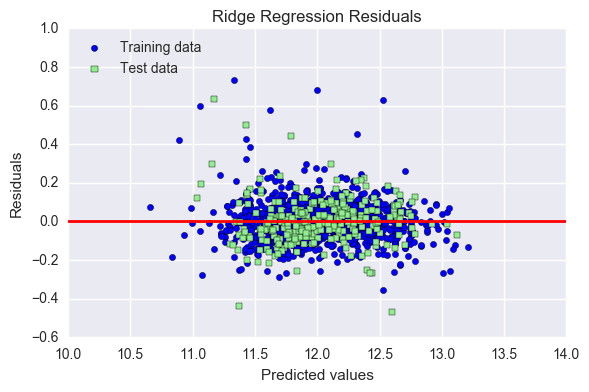

In [128]:
plt.scatter(x=ridge_predict_train, y=(ridge_predict_train - train_y), c='blue', marker='o', label='Training data')
plt.scatter(y=(ridge_predict_test - test_y), x=ridge_predict_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([10, 14])
plt.title("Ridge Regression Residuals")
#plt.ylim([-.2, .2])
plt.tight_layout()
plt.show()

In [136]:
# lets find out if RANSAC with ridge does better
from sklearn.linear_model import Ridge
ransac = RANSACRegressor(Ridge(alpha = alpha), 
           max_trials=100, 
           min_samples=100, 
           residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
           residual_threshold=3.0, 
          random_state=0)
ransac.fit(train_X, train_y)

C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\linear_model\ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=Ridge(alpha=14.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=100, random_state=0,
        residual_metric=<function <lambda> at 0x000002637E9DA8C8>,
        residual_threshold=3.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [137]:
ransac_predict_train = ransac.predict(train_X)
ransac_predict_test = ransac.predict(test_X)

In [138]:
print('Train RMSE Ridge + RANSAC: %.3f ' % (
        RMSE(train_y, ransac_predict_train)))
print('Train R^2 Ridge + RANSAC: %.3f ' % (
        r2_score(train_y, ransac_predict_train)))
print('Test RMSE Ridge + RANSAC: %.3f ' % (
        RMSE(test_y, ransac_predict_test)))
print('Test R^2 Ridge + RANSAC: %.3f ' % (
        r2_score(test_y, ransac_predict_test)))

Train RMSE Ridge + RANSAC: 0.008 
Train R^2 Ridge + RANSAC: 0.938 
Test RMSE Ridge + RANSAC: 0.010 
Test R^2 Ridge + RANSAC: 0.914 


In [143]:
ransac_predict_test - ridge_predict_test

array([  5.32907052e-15,   0.00000000e+00,   1.06581410e-14,
        -3.55271368e-15,  -1.77635684e-15,  -1.77635684e-15,
        -1.77635684e-15,   0.00000000e+00,   3.55271368e-15,
         0.00000000e+00,   0.00000000e+00,   5.32907052e-15,
         1.77635684e-15,   0.00000000e+00,   3.55271368e-15,
         8.88178420e-15,  -1.77635684e-15,  -3.55271368e-15,
         0.00000000e+00,   1.77635684e-15,   3.55271368e-15,
        -3.55271368e-15,  -1.77635684e-15,  -3.55271368e-15,
        -3.55271368e-15,  -3.55271368e-15,   5.32907052e-15,
        -1.06581410e-14,   1.77635684e-15,   1.77635684e-15,
        -1.77635684e-15,   1.77635684e-15,  -1.77635684e-15,
        -1.77635684e-15,   1.77635684e-15,   7.10542736e-15,
         1.77635684e-15,   1.77635684e-15,   3.55271368e-15,
         1.77635684e-15,   3.55271368e-15,  -3.55271368e-15,
         3.55271368e-15,  -1.77635684e-15,  -1.77635684e-15,
        -3.55271368e-15,   3.55271368e-15,   1.77635684e-15,
        -1.77635684e-15,

Nope..nothing changed, practically..

Ridge picked 229 features and eliminated the other 1 features


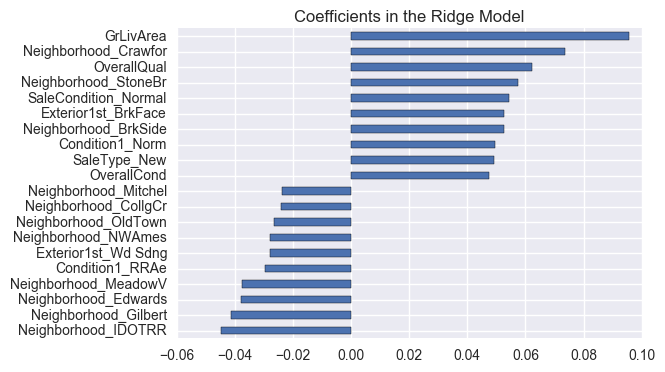

In [144]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = train_X.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

This is consistent with the findings of EDA -- GrLivArea, Neighbourhood, OverallQual are the strongest predictors. 

In [147]:
crawford = df_train[df_train['Neighborhood_Crawfor'] == 1]['SalePrice']

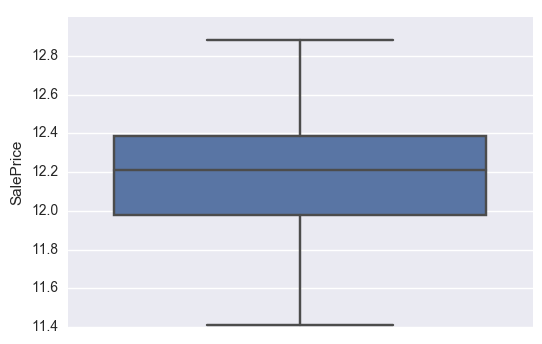

In [149]:
sns.boxplot(y=crawford)

In [150]:
others = df_train[df_train['Neighborhood_Crawfor'] == 0]['SalePrice']

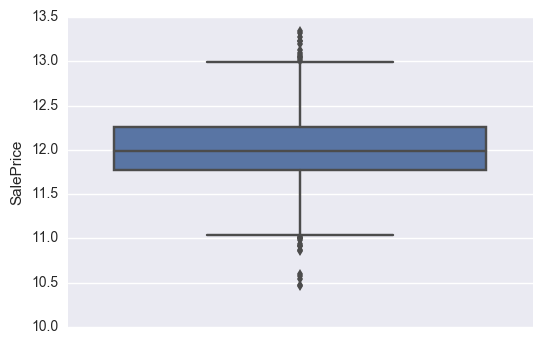

In [151]:
sns.boxplot(y=others)

<a id='#LRL1'></a>

#  Linear Regression with Lasso regularization (L1 penalty)

[[ go back to the top ]](#Table-of-contents)
LASSO stands for Least Absolute Shrinkage and Selection Operator. It is an alternative regularization method, where we simply replace the square of the weights by the sum of the absolute value of the weights. In contrast to L2 regularization, L1 regularization yields sparse feature vectors : most feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many features that are irrelevant.

In [188]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(train_X, train_y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0006


In [189]:
print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(train_X, train_y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00069


In [191]:
lasso_predict_train = lasso.predict(train_X)
lasso_predict_test = lasso.predict(test_X)

In [192]:
print('Train RMSE LR + Lasso: %.3f ' % (
        RMSE(train_y, lasso_predict_train)))
print('Train R^2 LR + Lasso: %.3f ' % (
        r2_score(train_y, lasso_predict_train)))
print('Test RMSE LR + Lasso: %.3f ' % (
        RMSE(test_y, lasso_predict_test)))
print('Test R^2 LR + Lasso: %.3f ' % (
        r2_score(test_y, lasso_predict_test)))

Train RMSE LR + Lasso: 0.009 
Train R^2 LR + Lasso: 0.933 
Test RMSE LR + Lasso: 0.010 
Test R^2 LR + Lasso: 0.917 


In [193]:
error_df.loc['Lasso Regression'] = pd.Series({'TRAIN_RMSE':0.009, 'TRAIN_R2':0.933, 'TEST_RMSE':0.010, 'TEST_R2':0.917})

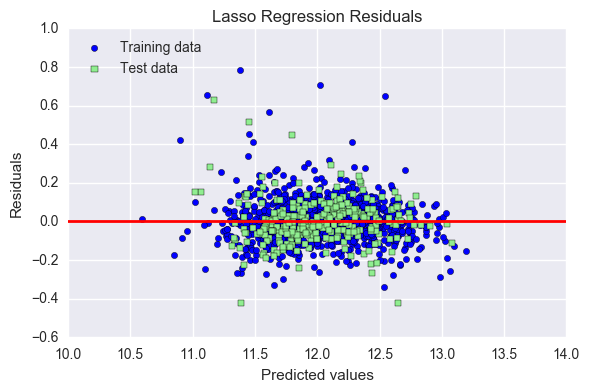

In [194]:
plt.scatter(x=lasso_predict_train, y=(lasso_predict_train - train_y), c='blue', marker='o', label='Training data')
plt.scatter(y=(lasso_predict_test - test_y), x=lasso_predict_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([10, 14])
plt.title("Lasso Regression Residuals")
#plt.ylim([-.2, .2])
plt.tight_layout()
plt.show()

Ridge picked 86 features and eliminated the other 144 features


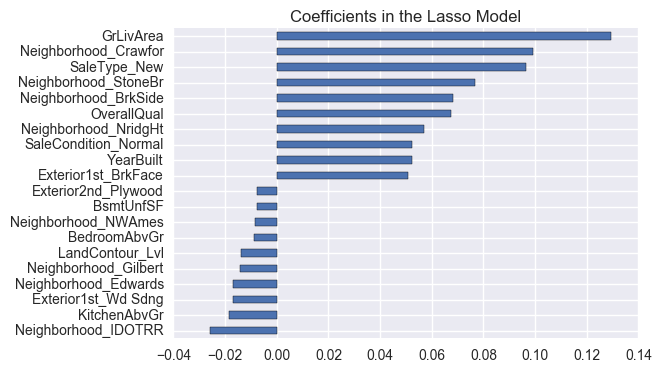

In [196]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = train_X.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

The feature selection again makes a lot of sense intuitively.

<a id='#LRL1L2'></a>

#  Linear Regression with ElasticNet regularization (L1 & L2 penalty)

[[ go back to the top ]](#Table-of-contents)
ElasticNet is a compromise between Ridge and Lasso regression. It has a L1 penalty to generate sparsity and a L2 penalty to overcome some of the limitations of Lasso, such as the number of variables (Lasso can't select more features than it has observations, but it's not the case here anyway).We control the convex combination of L1 and L2 using the l1_ratio parameter.

In [199]:
from sklearn.linear_model import ElasticNetCV
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(train_X, train_y)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.1
Best alpha : 0.006


In [200]:
print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(train_X, train_y)


Try again for more precision with l1_ratio centered around 0.1


ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6],
       copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.085000000000000006, 0.090000000000000011, 0.095000000000000001, 0.10000000000000001, 0.10500000000000001, 0.11000000000000001, 0.11499999999999999],
       max_iter=50000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [201]:
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.085
Best alpha : 0.006


In [202]:
print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(train_X, train_y)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.006
Best l1_ratio : 0.085
Best alpha : 0.006


In [204]:
elastic_predict_train = elasticNet.predict(train_X)
elastic_predict_test = elasticNet.predict(test_X)

In [205]:
print('Train RMSE LR + Elastic : %.3f ' % (
        RMSE(train_y, elastic_predict_train)))
print('Train R^2 LR + Elastic: %.3f ' % (
        r2_score(train_y, elastic_predict_train)))
print('Test RMSE LR + Elastic: %.3f ' % (
        RMSE(test_y, elastic_predict_test)))
print('Test R^2 LR + Elastic: %.3f ' % (
        r2_score(test_y, elastic_predict_test)))

Train RMSE LR + Elastic : 0.009 
Train R^2 LR + Elastic: 0.933 
Test RMSE LR + Elastic: 0.010 
Test R^2 LR + Elastic: 0.917 


In [206]:
error_df.loc['Elastic Net Regression'] = pd.Series({'TRAIN_RMSE':0.009, 'TRAIN_R2':0.933, 'TEST_RMSE':0.010, 'TEST_R2':0.917})

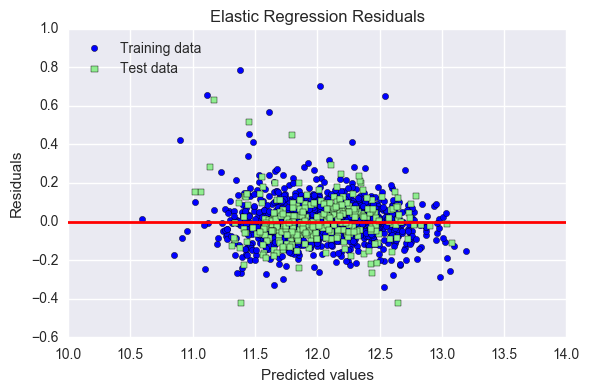

In [207]:
plt.scatter(x=lasso_predict_train, y=(lasso_predict_train - train_y), c='blue', marker='o', label='Training data')
plt.scatter(y=(lasso_predict_test - test_y), x=lasso_predict_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([10, 14])
plt.title("Elastic Regression Residuals")
#plt.ylim([-.2, .2])
plt.tight_layout()
plt.show()

Ridge picked 106 features and eliminated the other 124 features


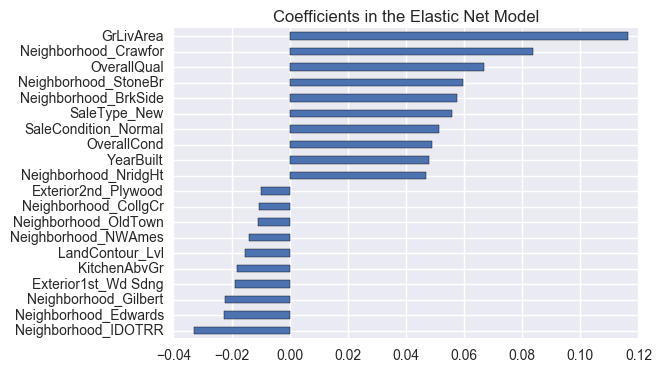

In [208]:
# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = train_X.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")
plt.show()

<a id='#LRPOLY'></a>

#  Linear Regression with Polynomial Features 

[[ go back to the top ]](#Table-of-contents)
With the previous model, the assumption was that a linear relationship between explanatory and response variables. One way to account for the violation of linearity assumption is to use a polynomial regression model by adding polynomial terms.

In [209]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(train_X)

In [ ]:
elasticNet.fit(X_quad,train_y)

<a id='#Random'></a>

#  Random Forest Regressor 

[[ go back to the top ]](#Table-of-contents)
A random forest, which is an ensemble of multiple decision trees, can be understood as the sum of piecewise linear functions in contrast to the global linear and polynomial regression models that we discussed previously. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(train_X, train_y)

In [204]:
forest_predict_train = forest.predict(train_X)
forest_predict_test = forest.predict(test_X)

In [205]:
print('Train RMSE Random Forest : %.3f ' % (
        RMSE(train_y, random_predict_train)))
print('Train R^2 Random Forest: %.3f ' % (
        r2_score(train_y, random_predict_train)))
print('Test RMSE Random Forest: %.3f ' % (
        RMSE(test_y, random_predict_test)))
print('Test R^2 Random Forest: %.3f ' % (
        r2_score(test_y, random_predict_test)))

Train RMSE LR + Elastic : 0.009 
Train R^2 LR + Elastic: 0.933 
Test RMSE LR + Elastic: 0.010 
Test R^2 LR + Elastic: 0.917 


In [206]:
error_df.loc['Random Forest Regression'] = pd.Series({'TRAIN_RMSE':, 'TRAIN_R2':, 'TEST_RMSE':, 'TEST_R2':})

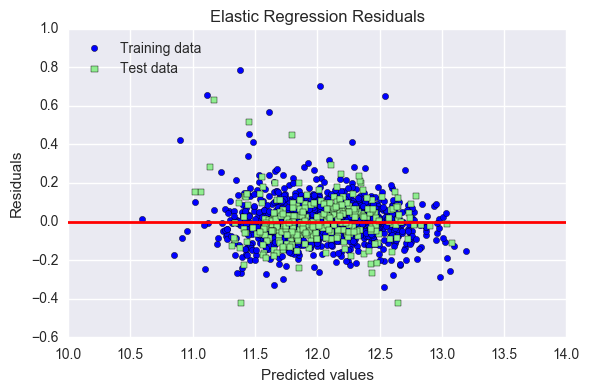

In [207]:
plt.scatter(x=forest_predict_train, y=(forest_predict_train - train_y), c='blue', marker='o', label='Training data')
plt.scatter(y=(forest_predict_test - test_y), x=forest_predict_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([10, 14])
plt.title("Random Forest Regression Residuals")
#plt.ylim([-.2, .2])
plt.tight_layout()
plt.show()

<a id='#SVR'></a>

#  Support Vector Regressor 

[[ go back to the top ]](#Table-of-contents)
 

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# Feature Selection

[[ go back to the top ]](#Table-of-contents)

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.<br>
Irrelevant or partially relevant features can negatively impact model performance.<br>
There are automatic feature selection techniques that you can use to prepare your machine learning data in python with scikit-learn.<br>
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.<br>
Three benefits of performing feature selection before modeling your data are:<br>
Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.<br>
Improves Accuracy: Less misleading data means modeling accuracy improves.<br>
Reduces Training Time: Less data means that algorithms train faster.<br>
<br>
##### 1. Univariate Selection<br>
Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.<br>
The example below uses the chi squared (chi^2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.<br>
<br>
#Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)<br>
from sklearn.feature_selection import SelectKBest<br>
from sklearn.feature_selection import chi2<br>
array = data.values<br>
X = array[:,0:8]<br>
Y = array[:,8]<br>
#feature extraction<br>
test = SelectKBest(score_func=chi2, k=4)<br>
fit = test.fit(X, Y)<br>
#summarize scores<br>
numpy.set_printoptions(precision=3)<br>
print(fit.scores_)<br>
features = fit.transform(X)<br>
#summarize selected features<br>
print(features[0:5,:])<br>
<br>
[  111.52   1411.887    17.605    53.108  2175.565   127.669     5.393<br>
   181.304]<br>
[[ 148.     0.    33.6   50. ]<br>
 [  85.     0.    26.6   31. ]<br>
 [ 183.     0.    23.3   32. ]<br>
 [  89.    94.    28.1   21. ]<br>
 [ 137.   168.    43.1   33. ]]<br>
<br>
You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores): plas, test, mass and age.
<br>
##### 2. Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.<br>
It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.<br>
You can learn more about the RFE class in the scikit-learn documentation.<br>
The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.<br>
<br>
from sklearn.feature_selection import RFE<br>
from sklearn.linear_model import LogisticRegression<br>
array = data.values<br>
X = array[:,0:8]<br>
Y = array[:,8]<br>
model = LogisticRegression()<br>
rfe = RFE(model, 3)<br>
fit = rfe.fit(X, Y)<br>
print("Num Features: ",fit.n_features_) <br>
print("Selected Features: ",fit.support_)<br>
print("Feature Ranking: ",fit.ranking_)<br>
<br>
Num Features:  3 <br>
Selected Features:  [ True False False False False  True  True False]<br>
Feature Ranking:  [1 2 3 5 6 1 1 4]<br>
<br>
You can see that RFE chose the the top 3 features as preg, mass and pedi.<br>
These are marked True in the support array and marked with a choice “1” in the ranking array.<br>
<br>
##### 3. Principal Component Analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.<br>
Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.<br>
In the example below, we use PCA and select 3 principal components.
<br>
from sklearn.decomposition import PCA<br>
X = array[:,0:8]<br>
Y = array[:,8]<br>
#feature extraction<br>
pca = PCA(n_components=3)<br>
fit = pca.fit(X)<br>
#summarize components<br>
print("Explained Variance: ",fit.explained_variance_ratio_)<br>
print(fit.components_)<br>
<br>
Explained Variance:  [ 0.889  0.062  0.026]<br>
[[ -2.022e-03   9.781e-02   1.609e-02   6.076e-02   9.931e-01   1.401e-02<br>
    5.372e-04  -3.565e-03] <br>
 [  2.265e-02   9.722e-01   1.419e-01  -5.786e-02  -9.463e-02   4.697e-02<br>
    8.168e-04   1.402e-01]<br>
 [ -2.246e-02   1.434e-01  -9.225e-01  -3.070e-01   2.098e-02  -1.324e-01<br>
   -6.400e-04  -1.255e-01]]<br>
<br>
You can see that the transformed dataset (3 principal components) bare little resemblance to the source data.<br>
<br>
#### 4. Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.<br>
<br>
from sklearn.ensemble import ExtraTreesClassifier<br>
#feature extraction<br>
model = ExtraTreesClassifier()<br>
model.fit(X, Y)<br>
print(model.feature_importances_)<br>
<br>
[ 0.119  0.226  0.093  0.081  0.073  0.143  0.119  0.146]<br>
<br>
You can see that we are given an importance score for each attribute where the larger score the more important the attribute. The scores suggest at the importance of plas, age and mass.-+ <br>
USEFUL CODE :
<br>
features_list = input_df.columns.values[1::]<br>
X = input_df.values[:, 1::]<br>
y = input_df.values[:, 0]<br>
 <br>
#Fit a random forest with (mostly) default parameters to determine feature importance<br>
forest = RandomForestClassifier(oob_score=True, n_estimators=10000)<br>
forest.fit(X, y)<br>
feature_importance = forest.feature_importances_ <br>
 <br>
#make importances relative to max importance<br>
feature_importance = 100.0 * (feature_importance / feature_importance.max())<br>
 <br>
#A threshold below which to drop features from the final data set. Specifically, this number represents<br>
#the percentage of the most important feature's importance value<br>
fi_threshold = 15<br>
 <br>
#Get the indexes of all features over the importance threshold<br>
important_idx = np.where(feature_importance > fi_threshold)[0]<br>
 <br>
#Create a list of all the feature names above the importance threshold<br>
important_features = features_list[important_idx]<br>
print "n", important_features.shape[0], "Important features(>", fi_threshold, "% of max importance):n",<br> 
        important_features<br>
<br>
#Get the sorted indexes of important features<br>
sorted_idx = np.argsort(feature_importance[important_idx])[::-1]<br>
print "nFeatures sorted by importance (DESC):n", important_features[sorted_idx]<br>
 <br>
#Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html <br>
pos = np.arange(sorted_idx.shape[0]) + .5 <br>
plt.subplot(1, 2, 2) <br>
plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], align='center') <br>
plt.yticks(pos, important_features[sorted_idx[::-1]]) <br>
plt.xlabel('Relative Importance') <br>
plt.title('Variable Importance') <br>
plt.draw()<br>
plt.show()<br>
 <br>
#Remove non-important features from the feature set, and reorder those remaining<br>
X = X[:, important_idx][:, sorted_idx]<br>

<a id='#Resampling'></a>

# Algorithm Evaluation With Resampling Methods

[[ go back to the top ]](#Table-of-contents)
### Split into Train and Test Sets
The simplest method that we can use to evaluate the performance of a machine learning algorithm is to use different training and testing datasets.<br>
We can take our original dataset, split it into two parts. Train the algorithm on the first part, make predictions on the second part and evaluate the predictions against the expected results.<br>
The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.<br>
This algorithm evaluation technique is very fast. It is ideal for large datasets (millions of records) where there is strong evidence that both splits of the data are representative of the underlying problem. Because of the speed, it is useful to use this approach when the algorithm you are investigating is slow to train.<br>
A downside of this technique is that it can have a high variance. This means that differences in the training and test dataset can result in meaningful differences in the estimate of accuracy.<br>
In the example below we split the data Pima Indians dataset into 67%/33% split for training and test and evaluate the accuracy of a Logistic Regression model.<br>
<br>
#Evaluate using a train and a test set<br>
import sklearn <br>
from sklearn import cross_validation <br>
from sklearn.linear_model import LogisticRegression <br>
test_size = 0.33<br>
seed = 7<br>
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)<br>
model = LogisticRegression()<br>
model.fit(X_train, Y_train)<br>
result = model.score(X_test, Y_test)<br>
print("Accuracy: {}".format(result*100.0))<br>
We can see that the estimated accuracy for the model was approximately 75%. Note that in addition to specifying the size of the split, we also specify the random seed. Because the split of the data is random, we want to ensure that the results are reproducible. By specifying the random seed we ensure that we get the same random numbers each time we run the code.<br>
This is important if we want to compare this result to the estimated accuracy of another machine learning algorithm or the same algorithm with a different configuration. To ensure the comparison was apples-for-apples, we must ensure that they are trained and tested on the same data.<br>  
### K-fold Cross Validation
Cross validation is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split.<br>
It works by splitting the dataset into k-parts (e.g. k=5 or k=10). Each split of the data is called a fold. The algorithm is trained on k-1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set.<br>
After running cross validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.<br>
The result is a more reliable estimate of the performance of the algorithm on new data given your test data. It is more accurate because the algorithm is trained and evaluated multiple times on different data.<br>
The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are common.<br>
10-fold cross validation.<br>
num_instances = len(X)<br>
seed = 7v
kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=seed)<br>
model = LogisticRegression()<br>
results = cross_validation.cross_val_score(model, X, Y, cv=kfold)<br>
print("Accuracy: ",results.mean()*100.0, results.std()*100.0)<br>
<br>
You can see that we report both the mean and the standard deviation of the performance measure. When summarizing performance measures, it is a good practice to summarize the distribution of the measures, in this case assuming a Gaussian distribution of performance (a very reasonable assumption) and recording the mean and standard deviation.<br>
### Leave One Out Cross Validation
You can configure cross validation so that the size of the fold is 1 (k is set to the number of observations in your dataset). This variation of cross validation is called leave-one-out cross validation.
The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of your model on unseen data. A downside is that it can be a computationally more expensive procedure than k-fold cross validation.<br>
num_folds = 10<br>
num_instances = len(X)<br>
loocv = cross_validation.LeaveOneOut(num_instances)<br>
model = LogisticRegression()<br>
results = cross_validation.cross_val_score(model, X, Y, cv=loocv)<br>
print("Accuracy: ",results.mean()*100.0, results.std()*100.0)<br>
You can see in the standard deviation that the score has more variance than the k-fold cross validation results described above.<br>
### Repeated Random Test-Train Splits
Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation.<br>
This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross validation. You can also repeat the process many more times as need. A down side is that repetitions may include much of the same data in the train or the test split from run to run, introducing redundancy into the evaluation.<br>
The example below splits the data into a 67%/33% train/test split and repeats the process 10 times.<br>
kfold = cross_validation.ShuffleSplit(num_instances, test_size=test_size, random_state=seed)<br>
model = LogisticRegression()<br>
results = cross_validation.cross_val_score(model, X, Y, cv=kfold)<br>
print("Accuracy: ",results.mean()*100.0, results.std()*100.0)<br>
We can see that the distribution of the performance measure is on par with k-fold cross validation above.<br>
### Stratified k-fold cross-validation
Stratified *k*-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% `Iris setosa` entries in one of the folds.<br>
<br>
import numpy as np<br>
from sklearn.cross_validation import StratifiedKFold<br>

def plot_cv(cv, n_samples):<br>
    masks = []<br>
    for train, test in cv: <br>
        mask = np.zeros(n_samples, dtype=bool)<br>
        mask[test] = 1<br>
        masks.append(mask)<br>
    <br>    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))<br>
<br>
##### What Techniques to Use When
Generally k-fold cross validation is the gold-standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.<br>
Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.<br>
Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.<br>
The best advice is to experiment and find a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross validation.<br>


<a id='#metrics'></a>

# Performance metrics

[[ go back to the top ]](#Table-of-contents)
### Classification Metrics
Classification problems are perhaps the most common type of machine learning problem and as such there are a myriad of metrics that can be used to evaluate predictions for these problems.
In this section we will review how to use the following metrics:
###### Classification Accuracy.
###### Logarithmic Loss.
###### Area Under ROC Curve.
###### Confusion Matrix.
###### Classification Report.
#### 1. Classification Accuracy
Classification accuracy is the number of correct predictions made as a ratio of all predictions made.<br>
This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.<br>
scoring = 'accuracy'
kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=seed)
model = LogisticRegression()
results = cross_validation.cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print("Accuracy: ",results.mean()*100.0, results.std()*100.0)

#### 2. Logarithmic Loss
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.<br>
The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.<br>
scoring = 'log_loss'
results = cross_validation.cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print("Accuracy: ",results.mean(), results.std())

Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the measure is inverted to be ascending when using the cross_val_score() function.

##### 3. Area Under ROC Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.<br>
ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.<br>
Sensitivity is the true positive rate also called the recall. It is the number instances from the positive (first) class that actually predicted correctly.<br>
Specificity is also called the true negative rate. Is the number of instances from the negative class (second) class that were actually predicted correctly.<br>
An ROC curve is the most commonly used way to visualize the performance of a binary classifier, and AUC is (arguably) the best way to summarize its performance in a single number.<br>
scoring = 'roc_auc'
results = cross_validation.cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print("Accuracy: ",results.mean(), results.std())
If the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions

#### 4. Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.
The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.<br>
For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction=0 and actual=0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual=1. And so on.<br>
from sklearn.metrics import confusion_matrix
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

#### 5. Classification Report
Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.<br>
The classification_report() function displays the precision, recall, f1-score and support for each class.
from sklearn.metrics import classification_report
0report = classification_report(Y_test, predicted)
print(report)
<b>Mean F Score</b><br>
The F1 score, commonly used in information retrieval, measures accuracy using the statistics precision p and recall r. Precision is the ratio of true positives (tp) to all predicted positives (tp + fp). Recall is the ratio of true positives to all actual positives (tp + fn). The F1 score is given by <br>
F1= 2*(pr)/(p+r) <br>
  where  p= (tp)/(tp + fp) , r= (tp)/(tp + fn)<br>
<br>
The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.
For MeanF1Score calculate F1 metrics for each label, and find their average, weighted by support (the number of true instances for each label).

<a id='#Spot-check'></a>

# Spot-check Algorithms

[[ go back to the top ]](#Table-of-contents)
Spot-checking is a way of discovering which algorithms perform well on your machine learning problem.<br>
You cannot know which algorithms are best suited to your problem before hand. You must trial a number of methods and focus attention on those that prove themselves the most promising.<br>
You can guess at what algorithms might do well on your dataset, and this can be a good starting point.<br>

Try a mixture of algorithm representations (e.g. instances and trees).<br>
Try a mixture of learning algorithms (e.g. different algorithms for learning the same type of representation).<br>
Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric).<br>
Let’s get specific. <br>
Algorithms Overview<br>
We are going to take a look at 6 classification algorithms to spot check on your dataset.<br>
##### 2 Linear Machine Learning Algorithms:
Logistic Regression <br>
Linear Discriminant Analysis <br>
###### 4 Nonlinear Machine Learning Algorithms:
K-Nearest Neighbors<br>
Naive Bayes<br>
Classification and Regression Trees<br>
Support Vector Machines<br>
<br>
kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=seed)<br>
model = LogisticRegression()<br>
results = cross_validation.cross_val_score(model, X, Y, cv=kfold)<br>
print("Accuracy: ",results.mean()*100.0, results.std()*100.0)<br>

<a id='#Spot-check'></a>

# Model Comparison and Selection

[[ go back to the top ]](#Table-of-contents)
<br>
#prepare models<br>
models = []<br>
models.append(('LR', LogisticRegression()))<br>
models.append(('LDA', LinearDiscriminantAnalysis()))<br>
models.append(('KNN', KNeighborsClassifier()))<br>
models.append(('CART', DecisionTreeClassifier()))<br>
models.append(('NB', GaussianNB()))<br>
models.append(('SVM', SVC()))<br>
#evaluate each model in turn<br>
results = []<br>
names = []<br>
scoring = 'accuracy' <br>
for name, model in models:<br>
    kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=seed)<br>
    cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)<br>
    results.append(cv_results)<br>
    names.append(name)<br>
    print("{} : {} , {}".format(name, cv_results.mean(), cv_results.std()))<br>
#boxplot algorithm comparison<br>
fig = plt.figure()<br>
fig.suptitle('Algorithm Comparison')<br>
ax = fig.add_subplot(111)<br>
plt.boxplot(results)<br>
ax.set_xticklabels(names)<br>
plt.show()<br>

"""

========================

Plotting Learning Curves

========================



On the left side the learning curve of a naive Bayes classifier is shown for

the digits dataset. Note that the training score and the cross-validation score

are both not very good at the end. However, the shape of the curve can be found

in more complex datasets very often: the training score is very high at the

beginning and decreases and the cross-validation score is very low at the

beginning and increases. On the right side we see the learning curve of an SVM

with RBF kernel. We can see clearly that the training score is still around

the maximum and the validation score could be increased with more training

samples.

"""

print(__doc__)



import numpy as np

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.datasets import load_digits

from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit





def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,

                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    """

    Generate a simple plot of the test and training learning curve.



    Parameters

    ----------

    estimator : object type that implements the "fit" and "predict" methods

        An object of that type which is cloned for each validation.



    title : string

        Title for the chart.



    X : array-like, shape (n_samples, n_features)

        Training vector, where n_samples is the number of samples and

        n_features is the number of features.



    y : array-like, shape (n_samples) or (n_samples, n_features), optional

        Target relative to X for classification or regression;

        None for unsupervised learning.



    ylim : tuple, shape (ymin, ymax), optional

        Defines minimum and maximum yvalues plotted.



    cv : int, cross-validation generator or an iterable, optional

        Determines the cross-validation splitting strategy.

        Possible inputs for cv are:

          - None, to use the default 3-fold cross-validation,

          - integer, to specify the number of folds.

          - An object to be used as a cross-validation generator.

          - An iterable yielding train/test splits.



        For integer/None inputs, if ``y`` is binary or multiclass,

        :class:`StratifiedKFold` used. If the estimator is not a classifier

        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.



        Refer :ref:`User Guide <cross_validation>` for the various

        cross-validators that can be used here.



    n_jobs : integer, optional

        Number of jobs to run in parallel (default 1).

    """

    plt.figure()

    plt.title(title)

    if ylim is not None:

        plt.ylim(*ylim)

    plt.xlabel("Training examples")

    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(

        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)

    train_scores_std = np.std(train_scores, axis=1)

    test_scores_mean = np.mean(test_scores, axis=1)

    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()



    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,

                     train_scores_mean + train_scores_std, alpha=0.1,

                     color="r")

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,

                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",

             label="Training score")

    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",

             label="Cross-validation score")



    plt.legend(loc="best")

    return plt





digits = load_digits()

X, y = digits.data, digits.target





title = "Learning Curves (Naive Bayes)"

#Cross validation with 100 iterations to get smoother mean test and train

#score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)



estimator = GaussianNB()

plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)



title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"

#SVC is more expensive so we do a lower number of CV iterations:

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC(gamma=0.001)

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)



plt.show()

In [ ]:
"""

========================

Plotting Learning Curves

========================



On the left side the learning curve of a naive Bayes classifier is shown for

the digits dataset. Note that the training score and the cross-validation score

are both not very good at the end. However, the shape of the curve can be found

in more complex datasets very often: the training score is very high at the

beginning and decreases and the cross-validation score is very low at the

beginning and increases. On the right side we see the learning curve of an SVM

with RBF kernel. We can see clearly that the training score is still around

the maximum and the validation score could be increased with more training

samples.

"""

print(__doc__)



import numpy as np

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.datasets import load_digits

from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit





def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,

                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    """

    Generate a simple plot of the test and training learning curve.



    Parameters

    ----------

    estimator : object type that implements the "fit" and "predict" methods

        An object of that type which is cloned for each validation.



    title : string

        Title for the chart.



    X : array-like, shape (n_samples, n_features)

        Training vector, where n_samples is the number of samples and

        n_features is the number of features.



    y : array-like, shape (n_samples) or (n_samples, n_features), optional

        Target relative to X for classification or regression;

        None for unsupervised learning.



    ylim : tuple, shape (ymin, ymax), optional

        Defines minimum and maximum yvalues plotted.



    cv : int, cross-validation generator or an iterable, optional

        Determines the cross-validation splitting strategy.

        Possible inputs for cv are:

          - None, to use the default 3-fold cross-validation,

          - integer, to specify the number of folds.

          - An object to be used as a cross-validation generator.

          - An iterable yielding train/test splits.



        For integer/None inputs, if ``y`` is binary or multiclass,

        :class:`StratifiedKFold` used. If the estimator is not a classifier

        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.



        Refer :ref:`User Guide <cross_validation>` for the various

        cross-validators that can be used here.



    n_jobs : integer, optional

        Number of jobs to run in parallel (default 1).

    """

    plt.figure()

    plt.title(title)

    if ylim is not None:

        plt.ylim(*ylim)

    plt.xlabel("Training examples")

    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(

        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)

    train_scores_std = np.std(train_scores, axis=1)

    test_scores_mean = np.mean(test_scores, axis=1)

    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()



    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,

                     train_scores_mean + train_scores_std, alpha=0.1,

                     color="r")

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,

                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",

             label="Training score")

    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",

             label="Cross-validation score")



    plt.legend(loc="best")

    return plt





digits = load_digits()

X, y = digits.data, digits.target





title = "Learning Curves (Naive Bayes)"

# Cross validation with 100 iterations to get smoother mean test and train

# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)



estimator = GaussianNB()

plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)



title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"

# SVC is more expensive so we do a lower number of CV iterations:

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC(gamma=0.001)

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)



plt.show()

In [ ]:
## Adapted from http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

# assume classifier and training data is prepared...

train_sizes, train_scores, test_scores = learning_curve(
        forest, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(.1, 1., 10), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("RandomForestClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
plt.gca().invert_yaxis()
plt.grid()

# Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")

# Draw the plot and reset the y-axis
plt.draw()
plt.show()
plt.gca().invert_yaxis()

<a id='#Hyperparameters'></a>

# Hyper-parameter optimisation

[[ go back to the top ]](#Table-of-contents)
Phrased as a search problem, you can use different search strategies to find a good and robust parameter or set of parameters for an algorithm on a given problem.<br>
Two simple and easy search strategies are grid search and random search. Scikit-learn provides these two methods for algorithm parameter tuning and examples of each are provided below.<br>
#### Grid Search Parameter Tuning
Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. This is a one-dimensional grid search.<br>
<br>
from sklearn.linear_model import Ridge<br>
from sklearn.grid_search import GridSearchCV<br>
#prepare a range of alpha values to test<br>
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])<br>
#create and fit a ridge regression model, testing each alpha <br>
model = Ridge()<br>
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))<br>
grid.fit(X,Y)<br>
print(grid)<br>
#summarize the results of the grid search<br>
print(grid.best_score_)<br>
print(grid.best_estimator_.alpha)<br>
##### Random Search Parameter Tuning
Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations. A model is constructed and evaluated for each combination of parameters chosen.<br>
<br>
from scipy.stats import uniform as sp_rand<br>
from sklearn.linear_model import Ridge<br>
from sklearn.grid_search import RandomizedSearchCV<br>
#prepare a uniform distribution to sample for the alpha parameter<br>
param_grid = {'alpha': sp_rand()}<br>
#create and fit a ridge regression model, testing random alpha values<br>
model = Ridge()<br>
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100) <br>
rsearch.fit(X,Y) <br>
print(rsearch) <br>
#summarize the results of the random parameter search <br>
print(rsearch.best_score_) <br>
print(rsearch.best_estimator_.alpha) <br>

In [ ]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [ ]:
# Utility function to report optimal parameters
# (adapted from http://scikit-learn.org/stable/auto_examples/randomized_search.html)
def report(grid_scores, n_top=5):
    params = None
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Parameters with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
              score.mean_validation_score, np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
        
        if params == None:
            params = score.parameters
    
    return params

# The most common value for the max number of features to look at in each split is sqrt(# of features)
sqrtfeat = np.sqrt(X.shape[1]) 

# Simple grid test (162 combinations)
grid_test1 = { "n_estimators"      : [1000, 2500, 5000],
               "criterion"         : ["gini", "entropy"],
               "max_features"      : [sqrtfeat-1, sqrtfeat, sqrtfeat+1],
               "max_depth"         : [5, 10, 25],
               "min_samples_split" : [2, 5, 10] }

# Large randomized test using max_depth to control tree size (5000 possible combinations)
random_test1 = { "n_estimators"      : np.rint(np.linspace(X.shape[0]*2, X.shape[0]*4, 5)).astype(int),
                 "criterion"         : ["gini", "entropy"],
                 "max_features"      : np.rint(np.linspace(sqrtfeat/2, sqrtfeat*2, 5)).astype(int),
                 "max_depth"         : np.rint(np.linspace(1, X.shape[1]/2, 10),
                 "min_samples_split" : np.rint(np.linspace(2, X.shape[0]/50, 10)).astype(int) }

# Large randomized test using min_samples_leaf and max_leaf_nodes to control tree size (50k combinations)
random_test2 = { "n_estimators"      : np.rint(np.linspace(X.shape[0]*2, X.shape[0]*4, 5)).astype(int),
                 "criterion"         : ["gini", "entropy"],
                 "max_features"      : np.rint(np.linspace(sqrtfeat/2, sqrtfeat*2, 5)).astype(int),
                 "min_samples_split" : np.rint(np.linspace(2, X.shape[0]/50, 10)).astype(int),
                 "min_samples_leaf"  : np.rint(np.linspace(1, X.shape[0]/200, 10)).astype(int), 
                 "max_leaf_nodes"    : np.rint(np.linspace(10, X.shape[0]/50, 10)).astype(int) }

forest = RandomForestClassifier(oob_score=True)

print "Hyperparameter optimization using GridSearchCV..."
grid_search = GridSearchCV(forest, grid_test1, n_jobs=-1, cv=10)
grid_search.fit(X, y)
best_params_from_grid_search = scorereport.report(grid_search.grid_scores_)

print "Hyperparameter optimization using RandomizedSearchCV with max_depth parameter..."
grid_search = RandomizedSearchCV(forest, random_test1, n_jobs=-1, cv=10, n_iter=100)
grid_search.fit(X, y)
best_params_from_rand_search1 = scorereport.report(grid_search.grid_scores_)

print "...and using RandomizedSearchCV with min_samples_leaf + max_leaf_nodes parameters..."
grid_search = RandomizedSearchCV(forest, random_test2, n_jobs=-1, cv=10, n_iter=500)
grid_search.fit(X, y)
best_params_from_rand_search2 = scorereport.report(grid_search.grid_scores_)

<a id='#Pipeline'></a>

# A single Pipeline

[[ go back to the top ]](#Table-of-contents)


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

<a id='#Pickle'></a>

# Finalize the model

[[ go back to the top ]](#Table-of-contents)
##### Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python.
You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
Later you can load this file to deserialize your model and use it to make new predictions.
<br>
#Running the example saves the model to finalized_model.sav in your local working directory<br>
import pickle<br>
test_size = 0.33<br>
seed = 7<br>
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)<br>
#Fit the model on 33%<br>
model = LogisticRegression()<br>
model.fit(X_train, Y_train)<br>
#save the model to disk<br>
filename = 'finalized_model.sav'<br>
pickle.dump(model, open(filename, 'wb'))<br>
<br>
#load the model from disk<br>
loaded_model = pickle.load(open(filename, 'rb'))<br>
result = loaded_model.score(X_test, Y_test)<br>
print(result)<br>

<a id='#time'></a>

# If I had more time ....

[[ go back to the top ]](#Table-of-contents)

<a id='#Acknowledgement'></a>

# Acknowledgements

[[ go back to the top ]](#Table-of-contents)
<br>
<br>
SebastianRaschka's book Python Machine Learning
http://machinelearningmastery.com<br>
Notebook by [Randal S. Olson](http://www.randalolson.com/)<br>
https://www.kaggle.com/dgawlik/house-prices-eda<br>

https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset<br>

https://www.kaggle.com/apapiu/regularized-linear-models<br>

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python<br>
https://www.analyticsvidhya.com<br>
https://sebastianraschka.com/<br>
